<a href="https://colab.research.google.com/github/yjc-spec/CNN-based-Emotion-Classification-with-Optimization/blob/main/notebooks/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch
from torch import nn

import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, models
from torchvision.transforms import ToPILImage

from torch.autograd import Variable
import torch.utils.data as data
import pandas as pd
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader, TensorDataset

import sklearn.model_selection as sk
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dataset path load
train_path = '/content/drive/MyDrive/TrainData'

# 제일 높은거

In [ ]:
from google.colab import drive
import shutil
import os
import zipfile

zip_path = "/content/drive/MyDrive/pattern_term_project/TrainData.zip"

shutil.copy(zip_path, "/content/TrainData.zip")

with zipfile.ZipFile("/content/TrainData.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")
train_path = "/content/TrainData"

(Train: 24000개, Validation: 3000개)
***START EPOCH***
# Epoch : 1 / 100
Train Accuracy : 43.20%, Loss : 1.0623
Validation Accuracy : 49.40%, Loss : 0.9599
# Epoch : 2 / 100
Train Accuracy : 50.80%, Loss : 0.9707
Validation Accuracy : 58.83%, Loss : 0.8463
# Epoch : 3 / 100
Train Accuracy : 55.58%, Loss : 0.8994
Validation Accuracy : 64.50%, Loss : 0.7616
# Epoch : 4 / 100
Train Accuracy : 59.95%, Loss : 0.8362
Validation Accuracy : 67.60%, Loss : 0.7118
# Epoch : 5 / 100
Train Accuracy : 63.02%, Loss : 0.7851
Validation Accuracy : 69.70%, Loss : 0.6719


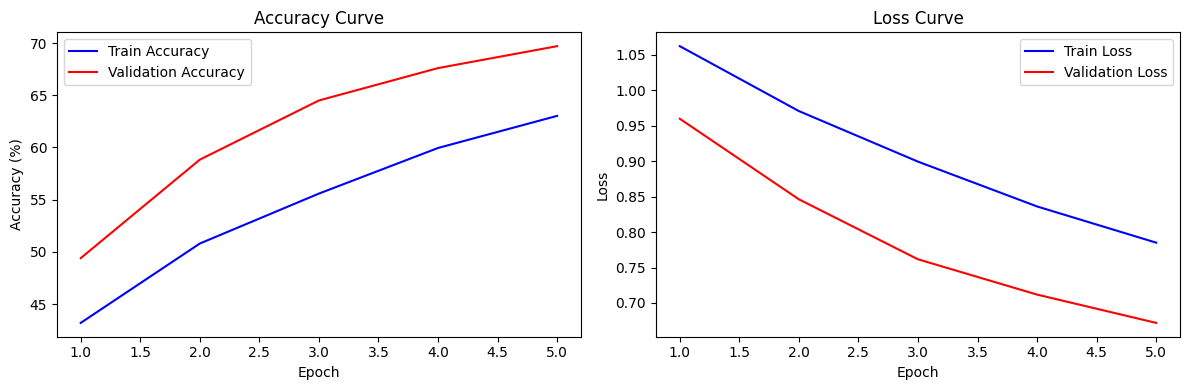

# Epoch : 6 / 100
Train Accuracy : 63.93%, Loss : 0.7664
Validation Accuracy : 69.43%, Loss : 0.6531
# Epoch : 7 / 100
Train Accuracy : 65.66%, Loss : 0.7383
Validation Accuracy : 70.50%, Loss : 0.6327
# Epoch : 8 / 100
Train Accuracy : 66.66%, Loss : 0.7212
Validation Accuracy : 71.33%, Loss : 0.6215
# Epoch : 9 / 100
Train Accuracy : 67.58%, Loss : 0.7011
Validation Accuracy : 72.57%, Loss : 0.5996
# Epoch : 10 / 100
Train Accuracy : 68.40%, Loss : 0.6927
Validation Accuracy : 72.60%, Loss : 0.5939


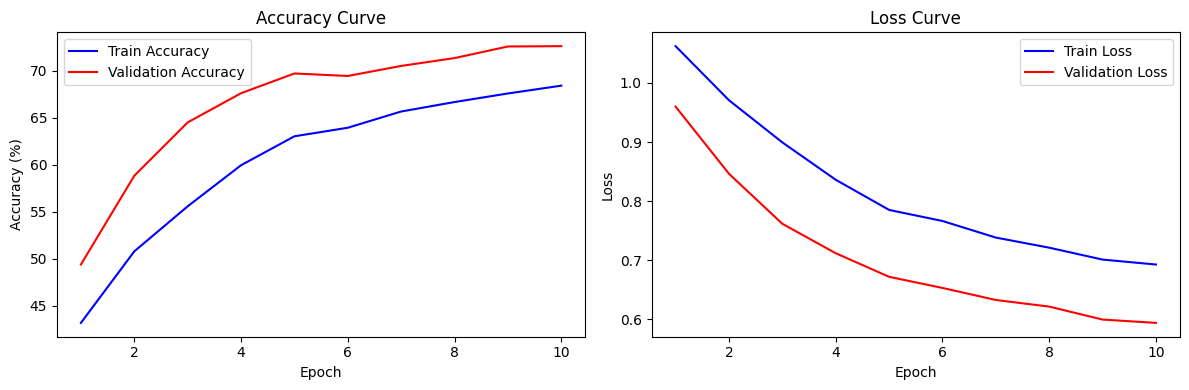

# Epoch : 11 / 100
Train Accuracy : 69.15%, Loss : 0.6753
Validation Accuracy : 73.87%, Loss : 0.5803
# Epoch : 12 / 100
Train Accuracy : 69.70%, Loss : 0.6712
Validation Accuracy : 74.13%, Loss : 0.5787
# Epoch : 13 / 100
Train Accuracy : 69.78%, Loss : 0.6585
Validation Accuracy : 74.03%, Loss : 0.5792
>> Not improved for 1 epochs
# Epoch : 14 / 100
Train Accuracy : 70.85%, Loss : 0.6450
Validation Accuracy : 74.47%, Loss : 0.5726
# Epoch : 15 / 100
Train Accuracy : 71.10%, Loss : 0.6430
Validation Accuracy : 74.60%, Loss : 0.5533


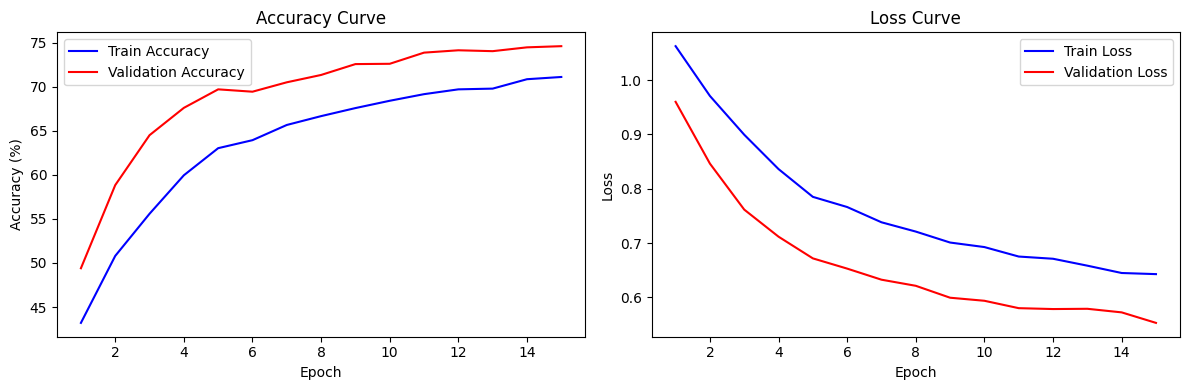

# Epoch : 16 / 100
Train Accuracy : 71.76%, Loss : 0.6267
Validation Accuracy : 74.60%, Loss : 0.5577
>> Not improved for 1 epochs
# Epoch : 17 / 100
Train Accuracy : 71.65%, Loss : 0.6285
Validation Accuracy : 75.10%, Loss : 0.5495
# Epoch : 18 / 100
Train Accuracy : 72.10%, Loss : 0.6212
Validation Accuracy : 75.00%, Loss : 0.5516
>> Not improved for 1 epochs
# Epoch : 19 / 100
Train Accuracy : 72.34%, Loss : 0.6183
Validation Accuracy : 75.07%, Loss : 0.5473
# Epoch : 20 / 100
Train Accuracy : 72.66%, Loss : 0.6066
Validation Accuracy : 75.17%, Loss : 0.5443


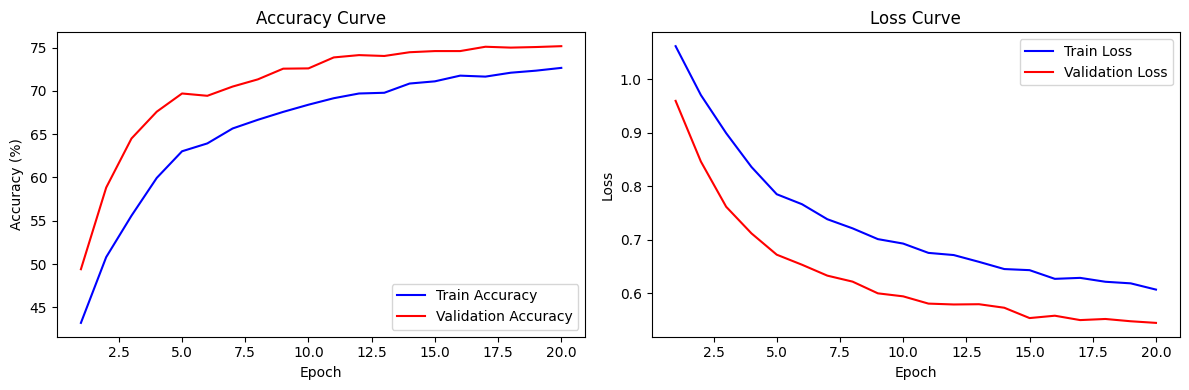

# Epoch : 21 / 100
Train Accuracy : 73.23%, Loss : 0.5995
Validation Accuracy : 76.00%, Loss : 0.5399
# Epoch : 22 / 100
Train Accuracy : 73.80%, Loss : 0.5930
Validation Accuracy : 75.70%, Loss : 0.5455
>> Not improved for 1 epochs
# Epoch : 23 / 100
Train Accuracy : 73.93%, Loss : 0.5881
Validation Accuracy : 76.23%, Loss : 0.5380
# Epoch : 24 / 100
Train Accuracy : 73.89%, Loss : 0.5892
Validation Accuracy : 75.87%, Loss : 0.5476
>> Not improved for 1 epochs
# Epoch : 25 / 100
Train Accuracy : 74.35%, Loss : 0.5809
Validation Accuracy : 76.20%, Loss : 0.5385
>> Not improved for 2 epochs


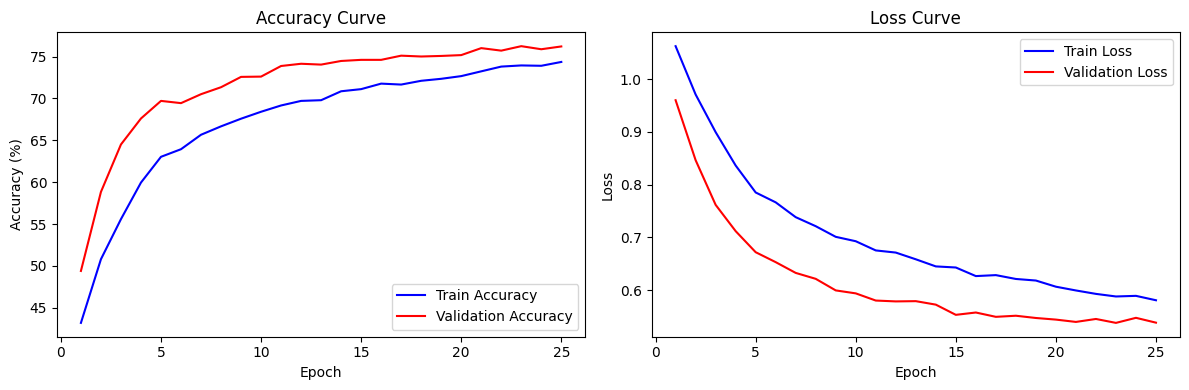

# Epoch : 26 / 100
Train Accuracy : 74.50%, Loss : 0.5768
Validation Accuracy : 76.73%, Loss : 0.5303
# Epoch : 27 / 100
Train Accuracy : 75.12%, Loss : 0.5666
Validation Accuracy : 76.37%, Loss : 0.5331
>> Not improved for 1 epochs
# Epoch : 28 / 100
Train Accuracy : 74.84%, Loss : 0.5665
Validation Accuracy : 76.10%, Loss : 0.5295
# Epoch : 29 / 100
Train Accuracy : 75.46%, Loss : 0.5617
Validation Accuracy : 76.83%, Loss : 0.5310
>> Not improved for 1 epochs
# Epoch : 30 / 100
Train Accuracy : 75.20%, Loss : 0.5612
Validation Accuracy : 76.33%, Loss : 0.5346
>> Not improved for 2 epochs


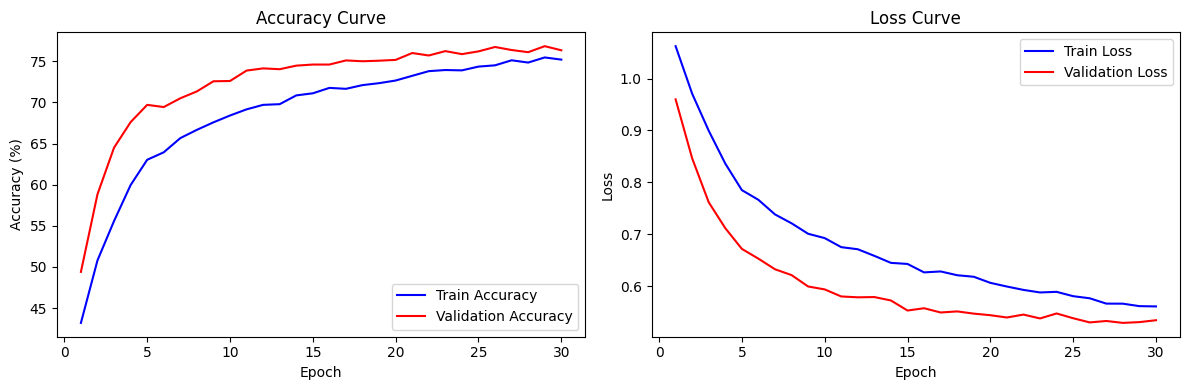

# Epoch : 31 / 100
Train Accuracy : 75.67%, Loss : 0.5576
Validation Accuracy : 76.67%, Loss : 0.5306
>> Not improved for 3 epochs
# Epoch : 32 / 100
Train Accuracy : 75.68%, Loss : 0.5521
Validation Accuracy : 77.30%, Loss : 0.5248
# Epoch : 33 / 100
Train Accuracy : 75.76%, Loss : 0.5503
Validation Accuracy : 76.13%, Loss : 0.5306
>> Not improved for 1 epochs
# Epoch : 34 / 100
Train Accuracy : 76.28%, Loss : 0.5432
Validation Accuracy : 76.50%, Loss : 0.5249
>> Not improved for 2 epochs
# Epoch : 35 / 100
Train Accuracy : 76.02%, Loss : 0.5412
Validation Accuracy : 76.63%, Loss : 0.5219


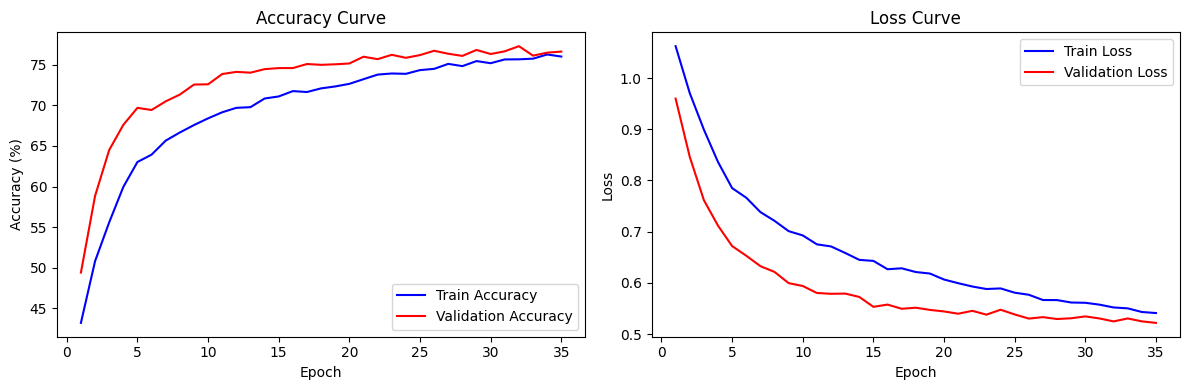

# Epoch : 36 / 100
Train Accuracy : 76.63%, Loss : 0.5374
Validation Accuracy : 77.77%, Loss : 0.5209
# Epoch : 37 / 100
Train Accuracy : 76.62%, Loss : 0.5324
Validation Accuracy : 77.40%, Loss : 0.5248
>> Not improved for 1 epochs
# Epoch : 38 / 100
Train Accuracy : 76.44%, Loss : 0.5320
Validation Accuracy : 77.50%, Loss : 0.5173
# Epoch : 39 / 100
Train Accuracy : 76.65%, Loss : 0.5312
Validation Accuracy : 77.33%, Loss : 0.5213
>> Not improved for 1 epochs
# Epoch : 40 / 100
Train Accuracy : 77.10%, Loss : 0.5271
Validation Accuracy : 77.83%, Loss : 0.5196
>> Not improved for 2 epochs


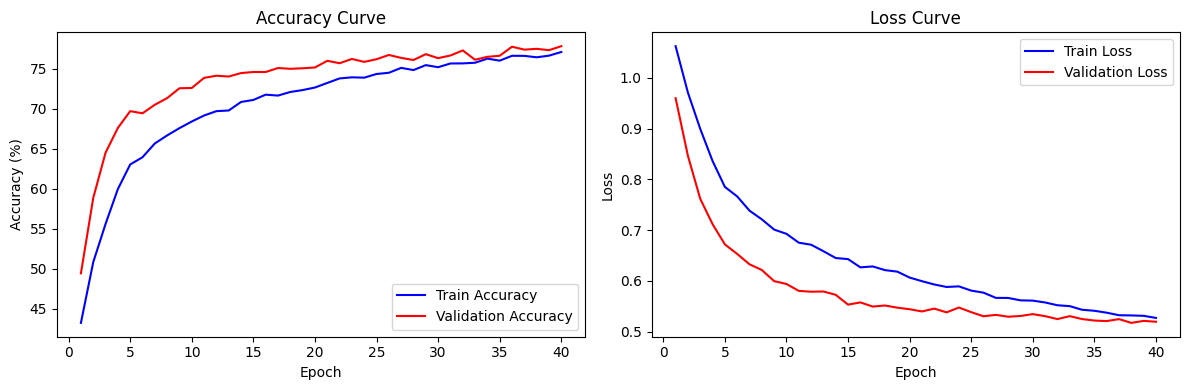

# Epoch : 41 / 100
Train Accuracy : 77.21%, Loss : 0.5252
Validation Accuracy : 76.63%, Loss : 0.5216
>> Not improved for 3 epochs
# Epoch : 42 / 100
Train Accuracy : 77.26%, Loss : 0.5181
Validation Accuracy : 77.80%, Loss : 0.5201
>> Not improved for 4 epochs
# Epoch : 43 / 100
Train Accuracy : 77.72%, Loss : 0.5120
Validation Accuracy : 77.93%, Loss : 0.5131
# Epoch : 44 / 100
Train Accuracy : 78.82%, Loss : 0.4989
Validation Accuracy : 77.07%, Loss : 0.5178
>> Not improved for 1 epochs
# Epoch : 45 / 100
Train Accuracy : 78.25%, Loss : 0.4977
Validation Accuracy : 78.33%, Loss : 0.5097


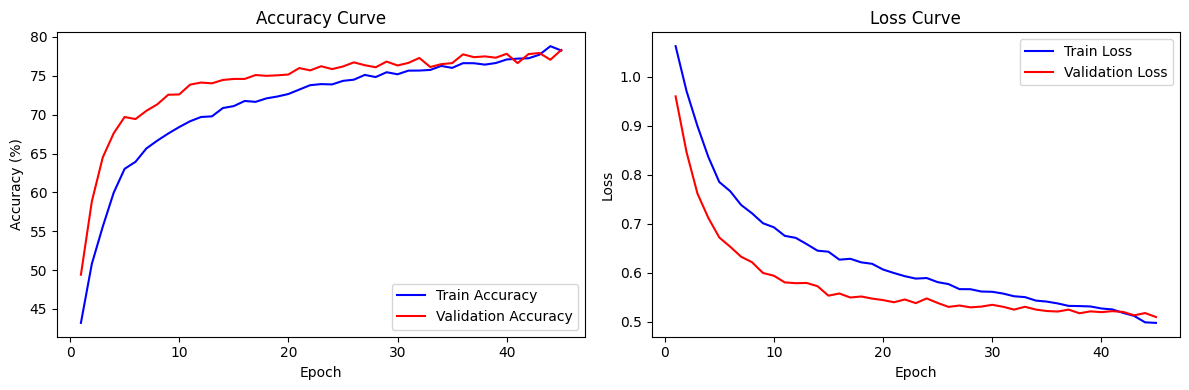

# Epoch : 46 / 100
Train Accuracy : 78.35%, Loss : 0.4994
Validation Accuracy : 78.20%, Loss : 0.5160
>> Not improved for 1 epochs
# Epoch : 47 / 100
Train Accuracy : 78.49%, Loss : 0.4940
Validation Accuracy : 77.87%, Loss : 0.5220
>> Not improved for 2 epochs
# Epoch : 48 / 100
Train Accuracy : 78.80%, Loss : 0.4899
Validation Accuracy : 77.70%, Loss : 0.5134
>> Not improved for 3 epochs
# Epoch : 49 / 100
Train Accuracy : 78.80%, Loss : 0.4882
Validation Accuracy : 78.20%, Loss : 0.5122
>> Not improved for 4 epochs
# Epoch : 50 / 100
Train Accuracy : 79.47%, Loss : 0.4809
Validation Accuracy : 78.20%, Loss : 0.5128
>> Not improved for 5 epochs


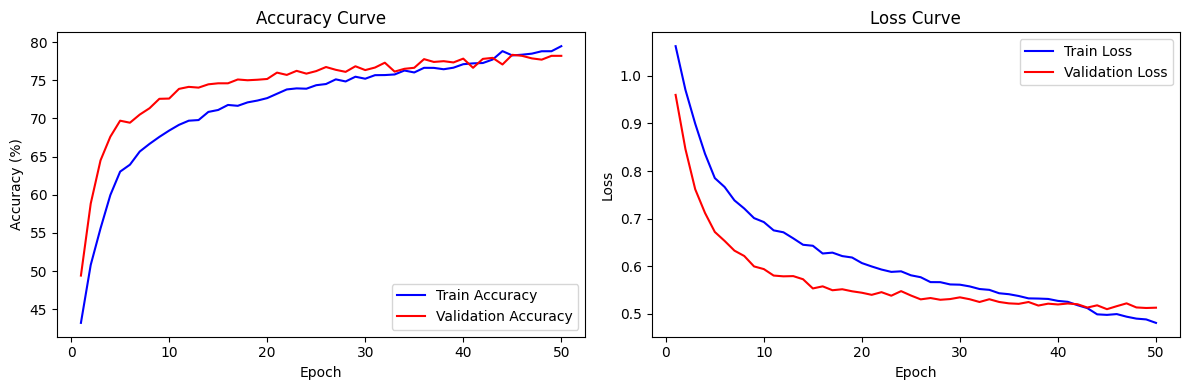

# Epoch : 51 / 100
Train Accuracy : 79.22%, Loss : 0.4828
Validation Accuracy : 78.30%, Loss : 0.5076
# Epoch : 52 / 100
Train Accuracy : 79.24%, Loss : 0.4823
Validation Accuracy : 78.43%, Loss : 0.5092
>> Not improved for 1 epochs
# Epoch : 53 / 100
Train Accuracy : 79.61%, Loss : 0.4760
Validation Accuracy : 78.27%, Loss : 0.5119
>> Not improved for 2 epochs
# Epoch : 54 / 100
Train Accuracy : 79.48%, Loss : 0.4758
Validation Accuracy : 77.93%, Loss : 0.5148
>> Not improved for 3 epochs
# Epoch : 55 / 100
Train Accuracy : 79.48%, Loss : 0.4791
Validation Accuracy : 77.73%, Loss : 0.5135
>> Not improved for 4 epochs


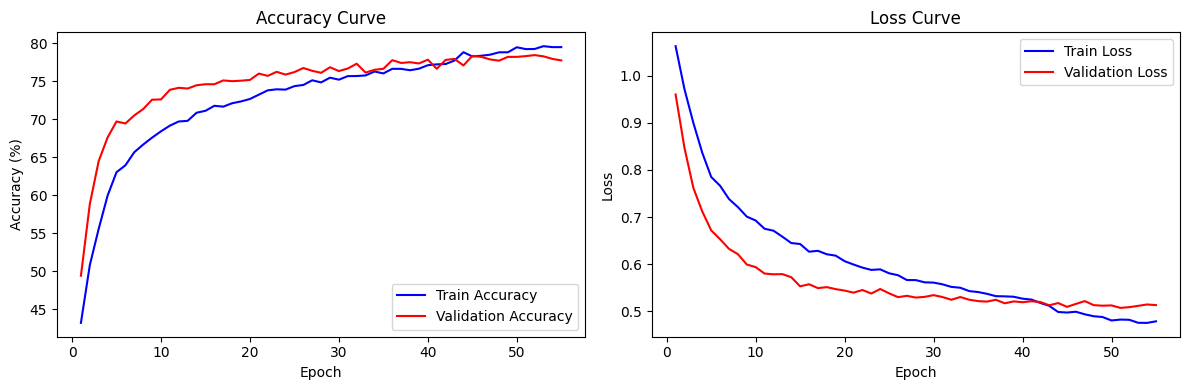

# Epoch : 56 / 100
Train Accuracy : 79.80%, Loss : 0.4718
Validation Accuracy : 78.10%, Loss : 0.5181
>> Not improved for 5 epochs
# Epoch : 57 / 100
Train Accuracy : 79.97%, Loss : 0.4709
Validation Accuracy : 77.87%, Loss : 0.5145
>> Not improved for 6 epochs
# Epoch : 58 / 100
Train Accuracy : 79.90%, Loss : 0.4698
Validation Accuracy : 78.57%, Loss : 0.5213
>> Not improved for 7 epochs
# Epoch : 59 / 100
Train Accuracy : 80.16%, Loss : 0.4644
Validation Accuracy : 78.33%, Loss : 0.5107
>> Not improved for 8 epochs
# Epoch : 60 / 100
Train Accuracy : 79.87%, Loss : 0.4684
Validation Accuracy : 78.80%, Loss : 0.5167
>> Not improved for 9 epochs


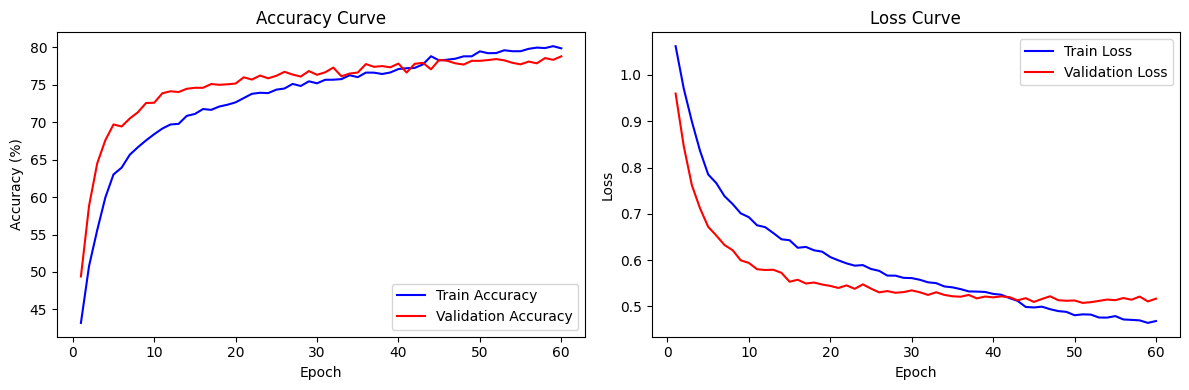

# Epoch : 61 / 100
Train Accuracy : 80.42%, Loss : 0.4569
Validation Accuracy : 78.30%, Loss : 0.5157
>> Not improved for 10 epochs
# Epoch : 62 / 100
Train Accuracy : 80.16%, Loss : 0.4610
Validation Accuracy : 78.13%, Loss : 0.5186
>> Not improved for 11 epochs
# Epoch : 63 / 100
Train Accuracy : 80.19%, Loss : 0.4636
Validation Accuracy : 78.80%, Loss : 0.5179
>> Not improved for 12 epochs
# Epoch : 64 / 100
Train Accuracy : 79.99%, Loss : 0.4656
Validation Accuracy : 77.83%, Loss : 0.5150
>> Not improved for 13 epochs
# Epoch : 65 / 100
Train Accuracy : 80.49%, Loss : 0.4598
Validation Accuracy : 78.50%, Loss : 0.5176
>> Not improved for 14 epochs


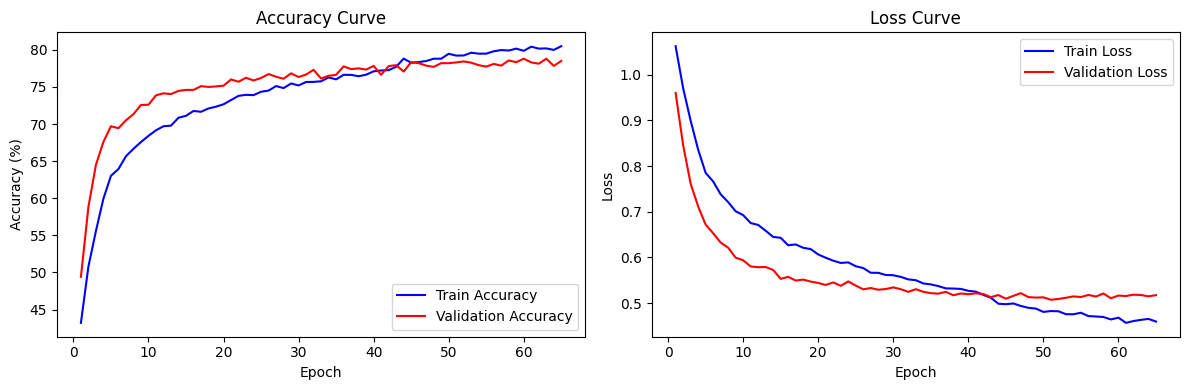

# Epoch : 66 / 100
Train Accuracy : 80.50%, Loss : 0.4562
Validation Accuracy : 78.73%, Loss : 0.5142
>> Not improved for 15 epochs
>> Early stopping triggered. Stopping at epoch 66.


In [ ]:
# Data augmentation
import torch
import torch.nn as nn

import torch
import torch.nn as nn
import os
import random
import numpy as np
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms

from torchvision import transforms
from torchvision.transforms import InterpolationMode
from torch.optim.lr_scheduler import ReduceLROnPlateau


train_transform = transforms.Compose([
    transforms.RandomAffine(
        degrees=15,
        translate=(0.1, 0.1),
        shear=0.1,
        scale=(0.9, 1.1),
        interpolation=InterpolationMode.NEAREST,
        fill=0
    ),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

raw_transform = transforms.Compose([
    transforms.ToTensor(),
])

valid_transform = transforms.Compose([
    transforms.ToTensor(),
])




# Data Load
classes = ['Happy', 'Neutral', 'Sad']  # Happy:0, Neutral:1, Sad:2

class FacialDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img = Image.open(self.file_paths[idx]).convert('RGB')

        if self.transform:
            img = self.transform(img)
        else:
            img = transforms.ToTensor()(img)

        return img, torch.tensor(self.labels[idx], dtype=torch.long)
# Data Load



file_paths, labels = [], []
for i, d in enumerate(classes):
    class_dir = os.path.join(train_path, d)
    for fname in os.listdir(class_dir):
        file_paths.append(os.path.join(class_dir, fname))
        labels.append(i)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    file_paths, labels,
    test_size=0.2, random_state=100, stratify=labels
)

# 5) 원본 train dataset
raw_train_ds = FacialDataset(X_train, Y_train, transform=raw_transform)

num_total = len(X_train)
random.seed(100)
aug_indices = random.sample(range(num_total), num_total)

aug_paths  = [X_train[i] for i in aug_indices]
aug_labels = [Y_train[i] for i in aug_indices]
aug_train_ds = FacialDataset(aug_paths, aug_labels, transform=train_transform)

combined_train_ds = ConcatDataset([raw_train_ds, aug_train_ds])

valid_ds = FacialDataset(X_valid, Y_valid, transform=valid_transform)


train_loader = DataLoader(
    combined_train_ds,
    batch_size=32,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)
valid_loader = DataLoader(
    valid_ds,
    batch_size=32,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

print(f"(Train: {len(combined_train_ds)}개, Validation: {len(valid_ds)}개)")


# Build convolutional neural net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3),
            nn.BatchNorm2d(16),
            nn.ReLU(),

            nn.Conv2d(16, 16, 3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout2d(0.3),
            nn.MaxPool2d(3,2),

            nn.Conv2d(16, 32, 3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, 3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout2d(0.3),
            nn.MaxPool2d(3,2),

            nn.Conv2d(32, 64, 3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout2d(0.3),
            nn.MaxPool2d(3,2),


            nn.Conv2d(64, 128, 3),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout2d(0.3),
            nn.MaxPool2d(3,2),


        )
        self.fc1 = nn.Linear(3200, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(64, 3)

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        return x

model = Net()
model.cuda()
# Training
def run_train(model, optimizer, criterion):
    model.train()

    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        batch_size = inputs.size(0)
        running_loss += loss.item() * batch_size

        _, preds = outputs.max(1)
        correct += torch.sum(preds == labels).item()
        total += batch_size

    avg_loss = running_loss / total
    accuracy = (correct / total) * 100
    return accuracy, avg_loss
# Validation
def run_valid(model, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            if torch.cuda.is_available():
                inputs = inputs.cuda()
                labels = labels.cuda()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            batch_size = inputs.size(0)
            running_loss += loss.item() * batch_size

            _, preds = outputs.max(1)
            correct += torch.sum(preds == labels).item()
            total += batch_size

    avg_loss = running_loss / total
    accuracy = (correct / total) * 100
    return accuracy, avg_loss
num_epochs = 100
patience = 15
best_val_loss = float('inf')
epochs_without_improve = 0

train_accuracies = []
valid_accuracies = []
train_losses = []
valid_losses = []
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay= 1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)
print('***START EPOCH***')

for epoch in range(num_epochs):
    train_acc, train_loss = run_train(model, optimizer, criterion)
    valid_acc, valid_loss = run_valid(model, criterion)

    train_accuracies.append(train_acc)
    valid_accuracies.append(valid_acc)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    scheduler.step(valid_loss)

    print(f'# Epoch : {epoch+1} / {num_epochs}')
    print(f'Train Accuracy : {train_acc:.2f}%, Loss : {train_loss:.4f}')
    print(f'Validation Accuracy : {valid_acc:.2f}%, Loss : {valid_loss:.4f}')
    if valid_loss < best_val_loss:
            best_val_loss = valid_loss
            epochs_without_improve = 0
            torch.save(model.state_dict(), 'final_try_2.pth')
    else:
        epochs_without_improve += 1
        print(f'>> Not improved for {epochs_without_improve} epochs')
        if epochs_without_improve >= patience:
            print(f'>> Early stopping triggered. Stopping at epoch {epoch+1}.')
            break
    if (epoch+1) % 5 == 0:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # 왼쪽 서브플롯: Accuracy Curve
        axes[0].plot(range(1, len(train_accuracies) + 1), train_accuracies, 'b-', label='Train Accuracy')
        axes[0].plot(range(1, len(valid_accuracies) + 1), valid_accuracies, 'r-', label='Validation Accuracy')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Accuracy (%)')
        axes[0].set_title('Accuracy Curve')
        axes[0].legend()

        # 오른쪽 서브플롯: Loss Curve
        axes[1].plot(range(1, len(train_losses) + 1), train_losses, 'b-', label='Train Loss')
        axes[1].plot(range(1, len(valid_losses) + 1), valid_losses, 'r-', label='Validation Loss')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Loss')
        axes[1].set_title('Loss Curve')
        axes[1].legend()

        plt.tight_layout()
        plt.show()


==== Fold 1 시작 ====
Epoch 01 Train: 42.90%/1.0679  Val: 53.27%/0.9381
saved best model
Epoch 02 Train: 51.72%/0.9634  Val: 60.27%/0.8197
saved best model
Epoch 03 Train: 56.11%/0.8912  Val: 63.37%/0.7596
saved best model
Epoch 04 Train: 59.72%/0.8379  Val: 66.27%/0.7107
saved best model
Epoch 05 Train: 61.91%/0.8018  Val: 68.67%/0.6645


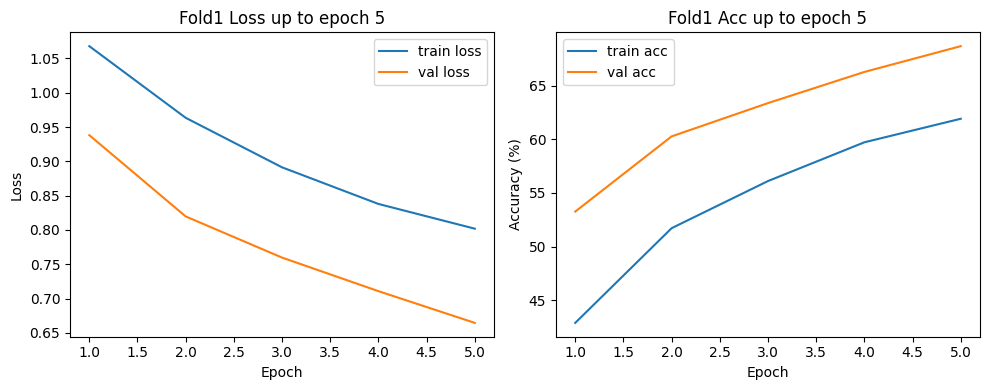

saved best model
Epoch 06 Train: 64.10%/0.7683  Val: 70.27%/0.6432
saved best model
Epoch 07 Train: 65.34%/0.7451  Val: 71.47%/0.6231
saved best model
Epoch 08 Train: 66.49%/0.7271  Val: 71.93%/0.6055
saved best model
Epoch 09 Train: 67.45%/0.7095  Val: 72.37%/0.5854
saved best model
Epoch 10 Train: 67.89%/0.6969  Val: 73.33%/0.5819


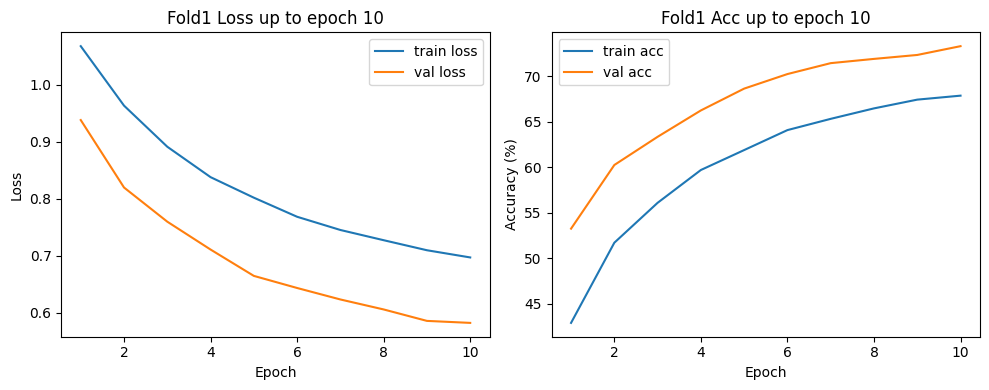

saved best model
Epoch 11 Train: 68.57%/0.6861  Val: 73.93%/0.5726
saved best model
Epoch 12 Train: 69.38%/0.6718  Val: 75.00%/0.5556
saved best model
Epoch 13 Train: 70.12%/0.6574  Val: 74.07%/0.5611
Epoch 14 Train: 70.74%/0.6498  Val: 74.50%/0.5419
saved best model
Epoch 15 Train: 71.71%/0.6441  Val: 76.00%/0.5331


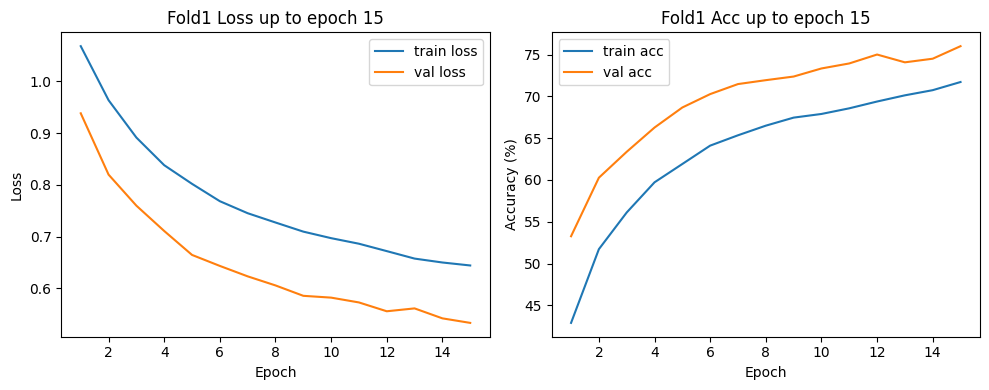

saved best model
Epoch 16 Train: 71.59%/0.6347  Val: 76.37%/0.5240
saved best model
Epoch 17 Train: 71.88%/0.6261  Val: 76.73%/0.5224
saved best model
Epoch 18 Train: 71.96%/0.6253  Val: 76.83%/0.5208
saved best model
Epoch 19 Train: 72.54%/0.6164  Val: 77.07%/0.5186
saved best model
Epoch 20 Train: 72.60%/0.6098  Val: 76.17%/0.5167


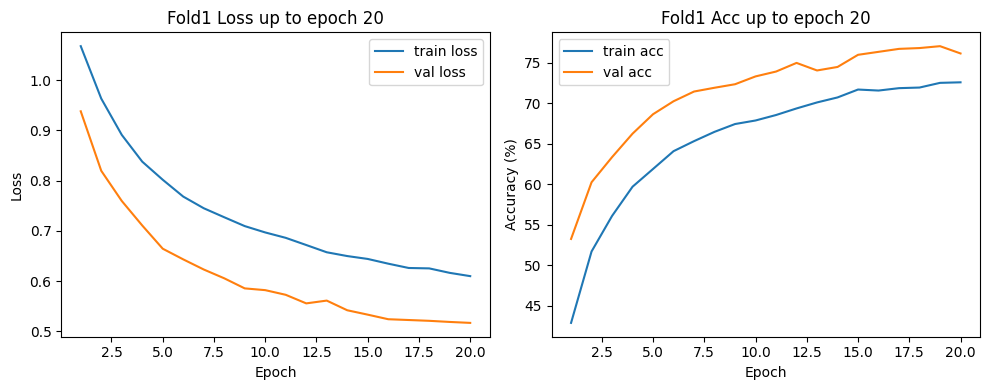

saved best model
Epoch 21 Train: 73.61%/0.6013  Val: 77.37%/0.5109
saved best model
Epoch 22 Train: 73.60%/0.5953  Val: 76.30%/0.5184
Epoch 23 Train: 73.75%/0.5966  Val: 77.83%/0.5017
saved best model
Epoch 24 Train: 74.35%/0.5859  Val: 76.83%/0.5134
Epoch 25 Train: 74.27%/0.5821  Val: 77.83%/0.4978


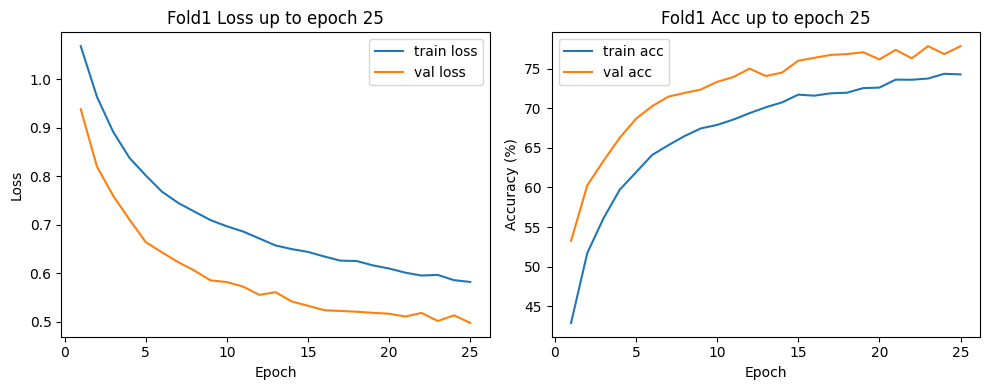

saved best model
Epoch 26 Train: 74.58%/0.5766  Val: 77.47%/0.5012
Epoch 27 Train: 74.87%/0.5706  Val: 76.73%/0.5016
Epoch 28 Train: 75.02%/0.5708  Val: 77.83%/0.4923
saved best model
Epoch 29 Train: 74.62%/0.5688  Val: 77.93%/0.4949
Epoch 30 Train: 75.00%/0.5662  Val: 77.13%/0.4999


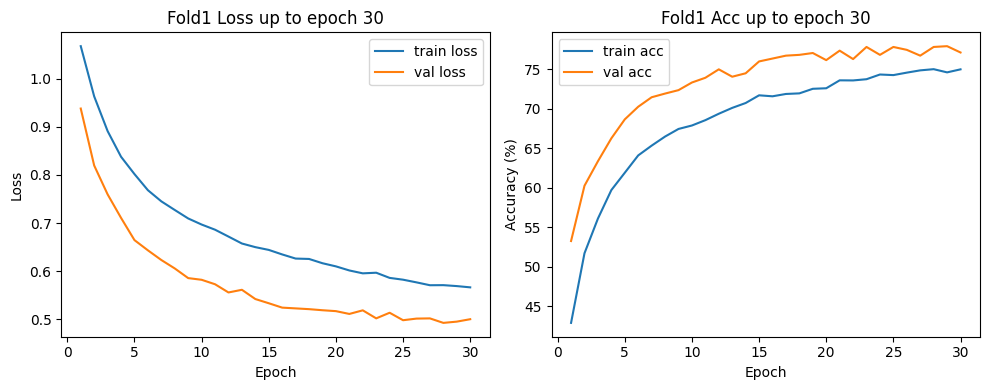

Epoch 31 Train: 75.71%/0.5583  Val: 77.87%/0.4962
Epoch 32 Train: 75.64%/0.5582  Val: 78.67%/0.4878
saved best model
Epoch 33 Train: 76.09%/0.5510  Val: 77.87%/0.4869
saved best model
Epoch 34 Train: 75.71%/0.5521  Val: 78.30%/0.4876
Epoch 35 Train: 75.79%/0.5493  Val: 78.43%/0.4930


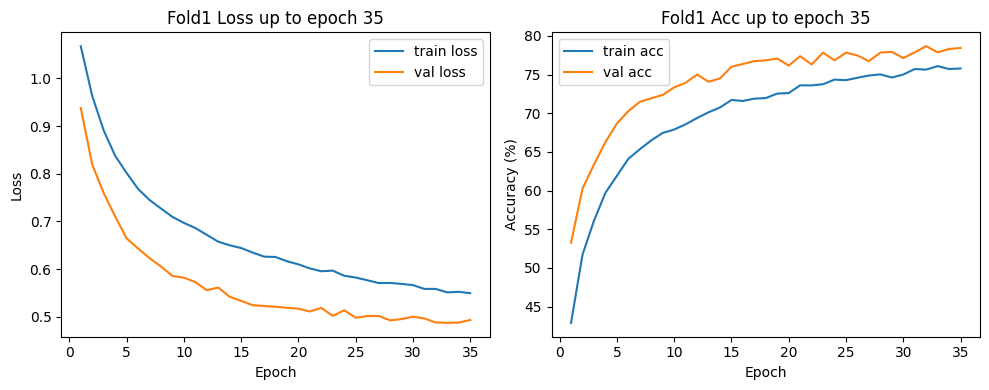

Epoch 36 Train: 76.18%/0.5422  Val: 78.57%/0.4914
Epoch 37 Train: 76.92%/0.5369  Val: 77.83%/0.5003
Epoch 38 Train: 77.19%/0.5281  Val: 78.47%/0.4812
saved best model
Epoch 39 Train: 77.23%/0.5219  Val: 78.47%/0.4804
saved best model
Epoch 40 Train: 77.39%/0.5166  Val: 78.80%/0.4823


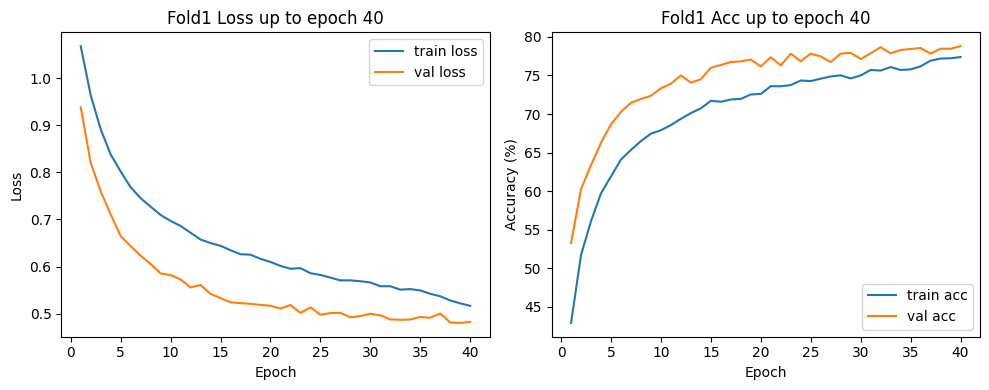

Epoch 41 Train: 77.72%/0.5160  Val: 78.67%/0.4806
Epoch 42 Train: 78.25%/0.5088  Val: 78.30%/0.4783
saved best model
Epoch 43 Train: 77.68%/0.5103  Val: 78.70%/0.4847
Epoch 44 Train: 78.07%/0.5038  Val: 78.20%/0.4831
Epoch 45 Train: 78.27%/0.5081  Val: 78.50%/0.4864


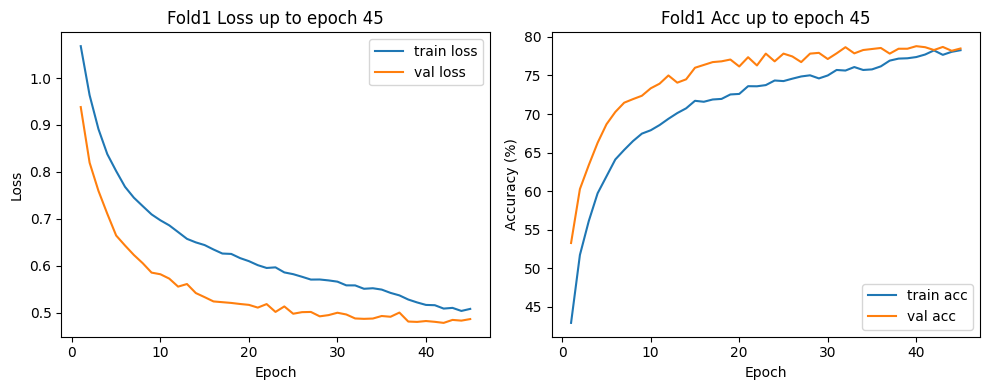

Epoch 46 Train: 77.93%/0.5083  Val: 78.83%/0.4837
Epoch 47 Train: 78.65%/0.5002  Val: 79.07%/0.4835
Epoch 48 Train: 78.33%/0.4913  Val: 78.53%/0.4775
saved best model
Epoch 49 Train: 78.65%/0.4934  Val: 78.43%/0.4829
Epoch 50 Train: 78.97%/0.4962  Val: 78.90%/0.4808


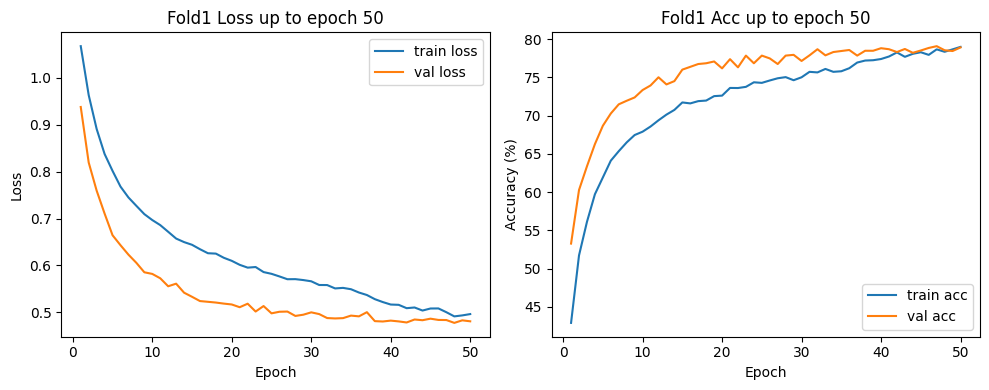

Epoch 51 Train: 79.22%/0.4839  Val: 78.63%/0.4805
Epoch 52 Train: 79.10%/0.4860  Val: 78.67%/0.4807
Epoch 53 Train: 78.92%/0.4905  Val: 78.67%/0.4785
Epoch 54 Train: 78.90%/0.4884  Val: 78.83%/0.4811
Epoch 55 Train: 79.33%/0.4792  Val: 78.83%/0.4839


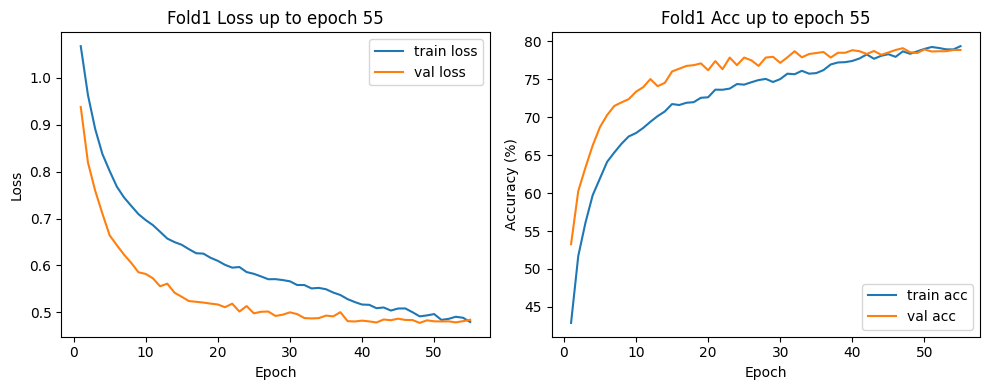

Epoch 56 Train: 79.58%/0.4807  Val: 78.87%/0.4816
Epoch 57 Train: 79.56%/0.4770  Val: 78.63%/0.4808
Epoch 58 Train: 79.56%/0.4777  Val: 78.80%/0.4806
Epoch 59 Train: 79.46%/0.4746  Val: 78.63%/0.4826
Epoch 60 Train: 79.50%/0.4785  Val: 78.70%/0.4834


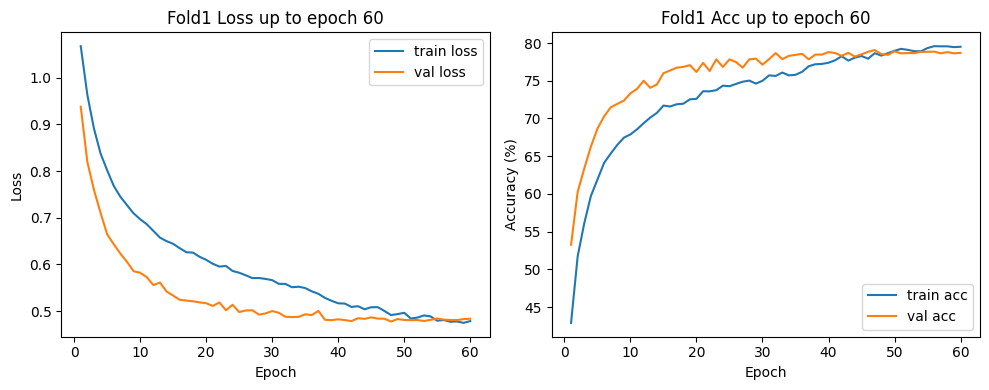

Epoch 61 Train: 79.76%/0.4769  Val: 78.97%/0.4813
Epoch 62 Train: 79.77%/0.4722  Val: 78.67%/0.4833
Epoch 63 Train: 79.37%/0.4764  Val: 78.90%/0.4827
early stopping at epoch 63
Fold 1 best val loss: 0.4775

==== Fold 2 시작 ====
Epoch 01 Train: 43.72%/1.0583  Val: 54.43%/0.9272
saved best model
Epoch 02 Train: 52.03%/0.9567  Val: 61.10%/0.8231
saved best model
Epoch 03 Train: 56.58%/0.8889  Val: 64.10%/0.7650
saved best model
Epoch 04 Train: 59.68%/0.8411  Val: 67.57%/0.7092
saved best model
Epoch 05 Train: 61.94%/0.7994  Val: 69.13%/0.6836


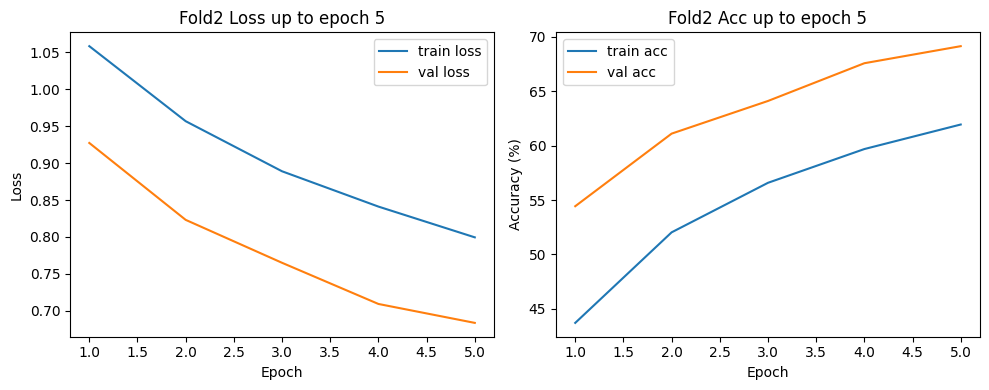

saved best model
Epoch 06 Train: 64.16%/0.7715  Val: 70.10%/0.6547
saved best model
Epoch 07 Train: 65.19%/0.7432  Val: 71.90%/0.6260
saved best model
Epoch 08 Train: 65.97%/0.7277  Val: 72.90%/0.6042
saved best model
Epoch 09 Train: 67.43%/0.7085  Val: 73.73%/0.5946
saved best model
Epoch 10 Train: 68.31%/0.6861  Val: 73.30%/0.5832


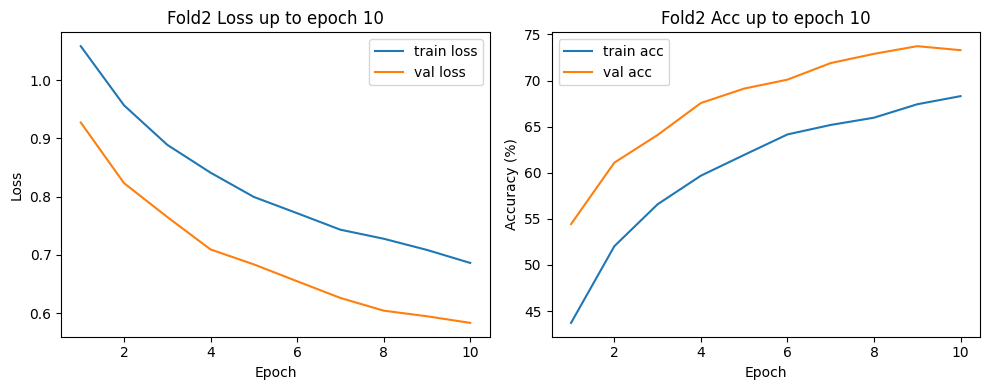

saved best model
Epoch 11 Train: 68.73%/0.6825  Val: 73.97%/0.5708
saved best model
Epoch 12 Train: 69.27%/0.6728  Val: 74.93%/0.5711
Epoch 13 Train: 69.67%/0.6627  Val: 74.80%/0.5579
saved best model
Epoch 14 Train: 70.67%/0.6454  Val: 75.47%/0.5489
saved best model
Epoch 15 Train: 70.88%/0.6441  Val: 75.60%/0.5494


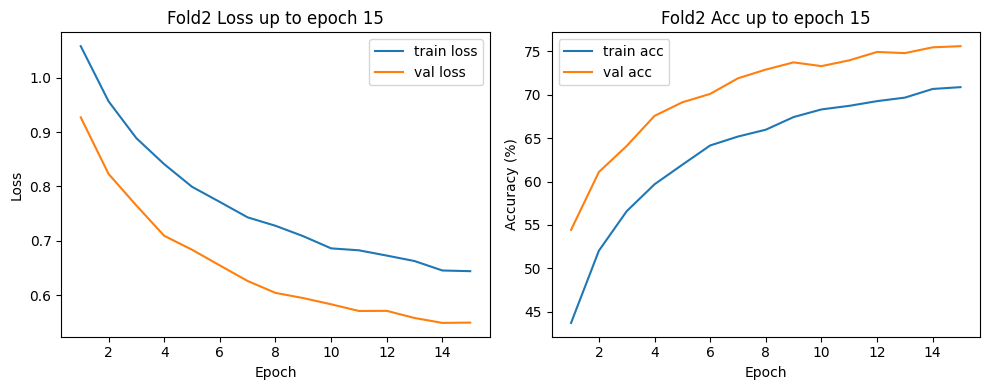

Epoch 16 Train: 71.38%/0.6362  Val: 76.00%/0.5394
saved best model
Epoch 17 Train: 71.73%/0.6332  Val: 75.83%/0.5340
saved best model
Epoch 18 Train: 71.66%/0.6227  Val: 76.00%/0.5326
saved best model
Epoch 19 Train: 72.28%/0.6146  Val: 75.87%/0.5318
saved best model
Epoch 20 Train: 72.53%/0.6126  Val: 76.83%/0.5197


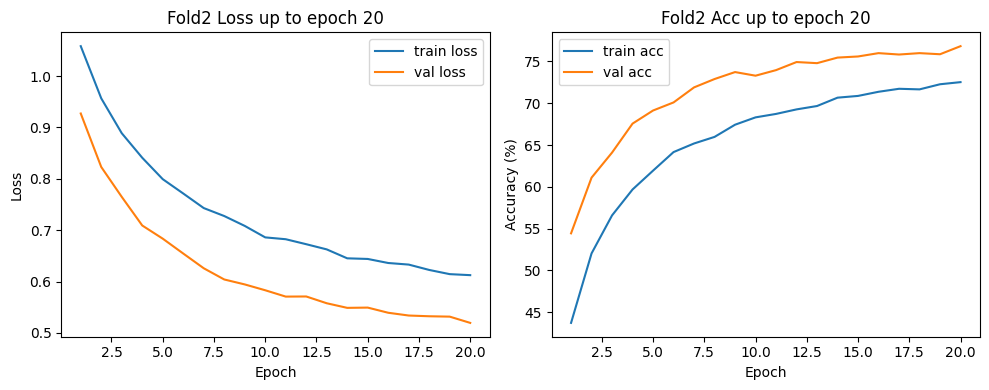

saved best model
Epoch 21 Train: 73.37%/0.6042  Val: 76.73%/0.5223
Epoch 22 Train: 72.97%/0.6035  Val: 77.33%/0.5128
saved best model
Epoch 23 Train: 73.20%/0.5974  Val: 77.67%/0.5160
Epoch 24 Train: 73.62%/0.5912  Val: 78.00%/0.5007
saved best model
Epoch 25 Train: 73.70%/0.5897  Val: 77.83%/0.5014


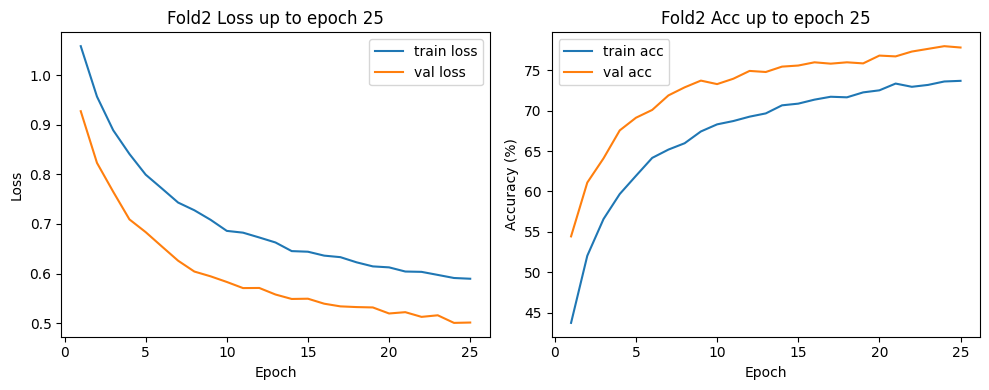

Epoch 26 Train: 74.10%/0.5805  Val: 77.13%/0.5129
Epoch 27 Train: 74.22%/0.5794  Val: 77.90%/0.5079
Epoch 28 Train: 74.08%/0.5802  Val: 78.63%/0.4996
saved best model
Epoch 29 Train: 74.97%/0.5696  Val: 77.87%/0.5019
Epoch 30 Train: 74.98%/0.5663  Val: 77.93%/0.4980


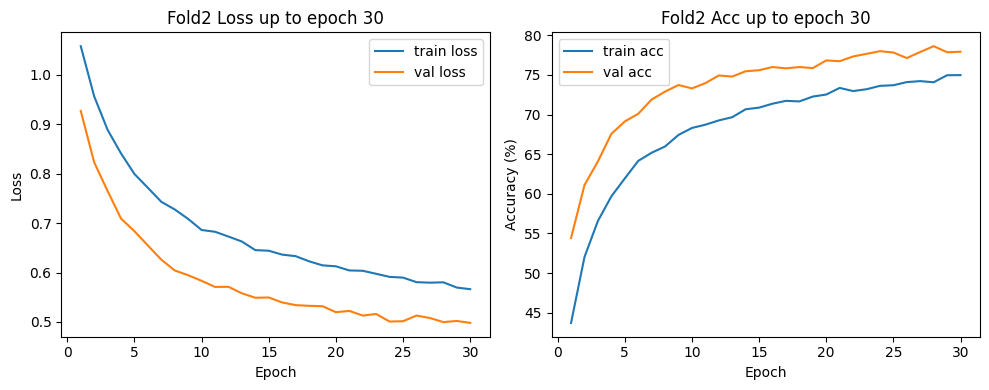

saved best model
Epoch 31 Train: 75.59%/0.5551  Val: 78.17%/0.5054
Epoch 32 Train: 75.37%/0.5562  Val: 78.67%/0.5000
Epoch 33 Train: 75.72%/0.5553  Val: 78.07%/0.4962
saved best model
Epoch 34 Train: 75.39%/0.5557  Val: 78.37%/0.4923
saved best model
Epoch 35 Train: 75.90%/0.5470  Val: 78.63%/0.5019


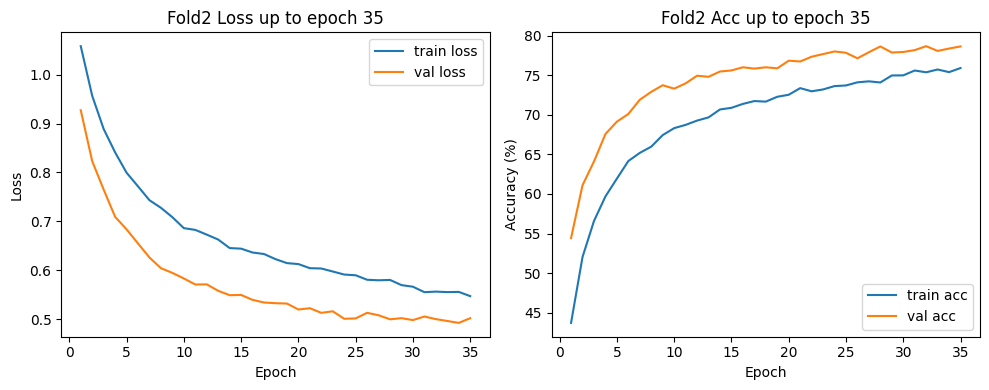

Epoch 36 Train: 76.15%/0.5432  Val: 79.43%/0.4899
saved best model
Epoch 37 Train: 75.77%/0.5395  Val: 78.63%/0.4966
Epoch 38 Train: 76.01%/0.5426  Val: 78.70%/0.4925
Epoch 39 Train: 76.32%/0.5373  Val: 79.17%/0.4909
Epoch 40 Train: 76.62%/0.5355  Val: 78.73%/0.4879


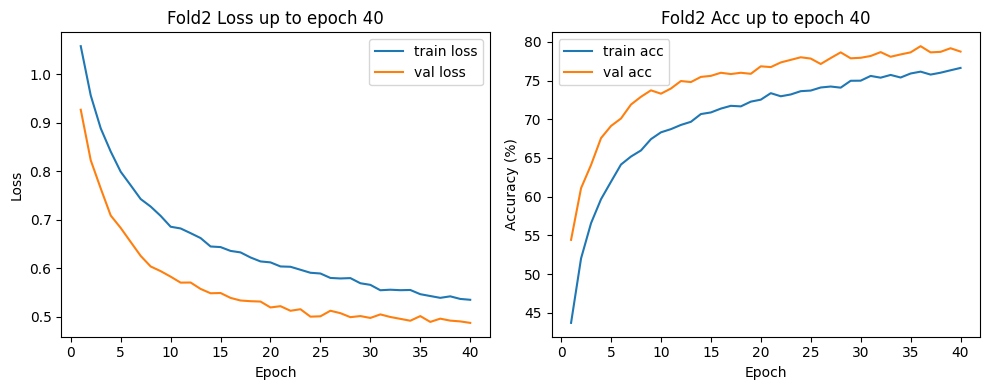

saved best model
Epoch 41 Train: 76.77%/0.5267  Val: 78.90%/0.4879
Epoch 42 Train: 77.15%/0.5283  Val: 78.73%/0.4852
saved best model
Epoch 43 Train: 77.26%/0.5227  Val: 79.10%/0.4926
Epoch 44 Train: 77.38%/0.5218  Val: 78.90%/0.4860
Epoch 45 Train: 77.34%/0.5192  Val: 79.43%/0.4848


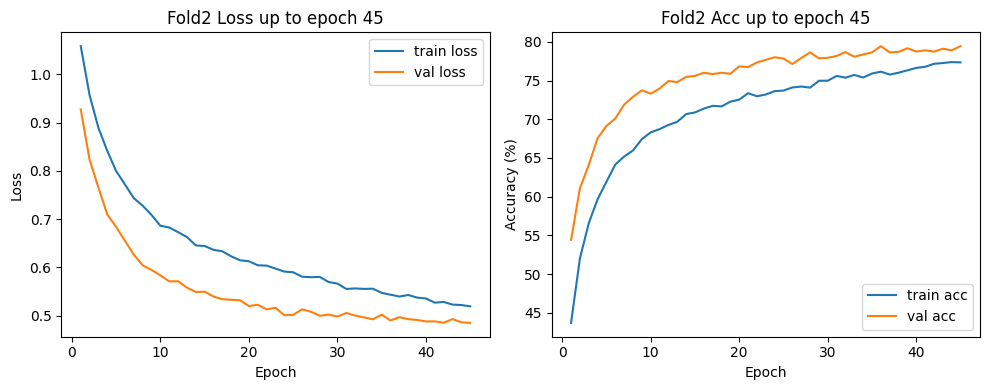

saved best model
Epoch 46 Train: 77.20%/0.5189  Val: 79.33%/0.4822
saved best model
Epoch 47 Train: 77.65%/0.5123  Val: 79.97%/0.4796
saved best model
Epoch 48 Train: 77.94%/0.5105  Val: 79.63%/0.4861
Epoch 49 Train: 77.77%/0.5096  Val: 79.83%/0.4766
saved best model
Epoch 50 Train: 77.85%/0.5115  Val: 78.77%/0.4913


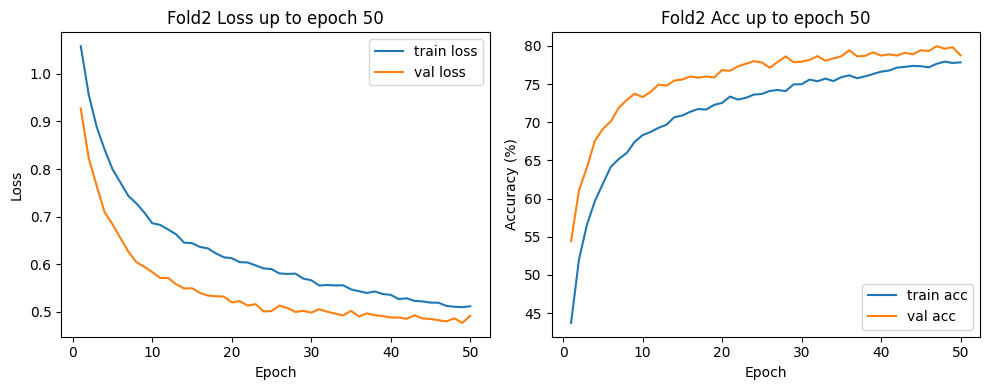

Epoch 51 Train: 77.92%/0.5046  Val: 79.67%/0.4808
Epoch 52 Train: 78.26%/0.5015  Val: 78.87%/0.4872
Epoch 53 Train: 78.25%/0.5024  Val: 79.03%/0.4871
Epoch 54 Train: 78.88%/0.4916  Val: 79.23%/0.4786
Epoch 55 Train: 79.39%/0.4825  Val: 79.80%/0.4802


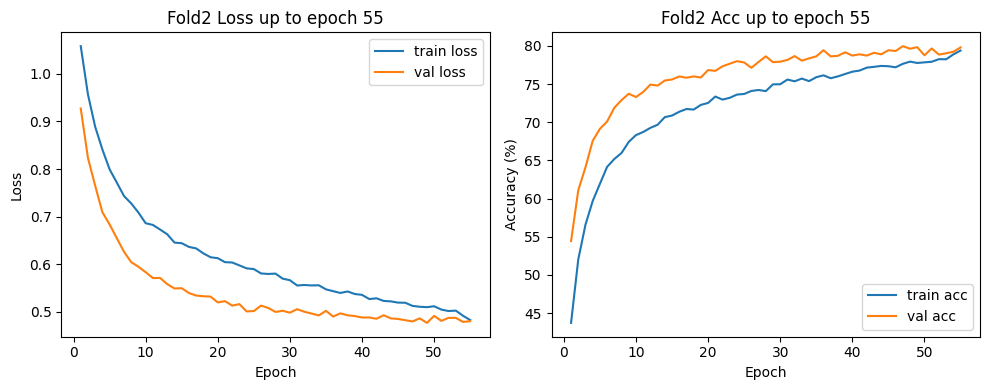

Epoch 56 Train: 79.00%/0.4817  Val: 79.80%/0.4790
Epoch 57 Train: 79.46%/0.4825  Val: 79.57%/0.4820
Epoch 58 Train: 79.82%/0.4699  Val: 79.90%/0.4763
saved best model
Epoch 59 Train: 80.25%/0.4641  Val: 80.13%/0.4765
Epoch 60 Train: 80.33%/0.4567  Val: 80.03%/0.4819


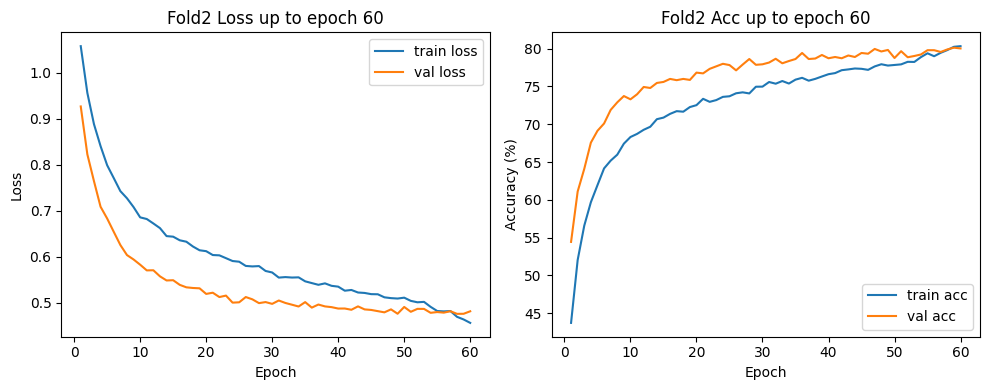

Epoch 61 Train: 80.06%/0.4617  Val: 79.67%/0.4808
Epoch 62 Train: 80.27%/0.4642  Val: 79.67%/0.4869
Epoch 63 Train: 80.54%/0.4544  Val: 79.77%/0.4799
Epoch 64 Train: 80.33%/0.4625  Val: 79.67%/0.4804
Epoch 65 Train: 80.57%/0.4556  Val: 79.83%/0.4804


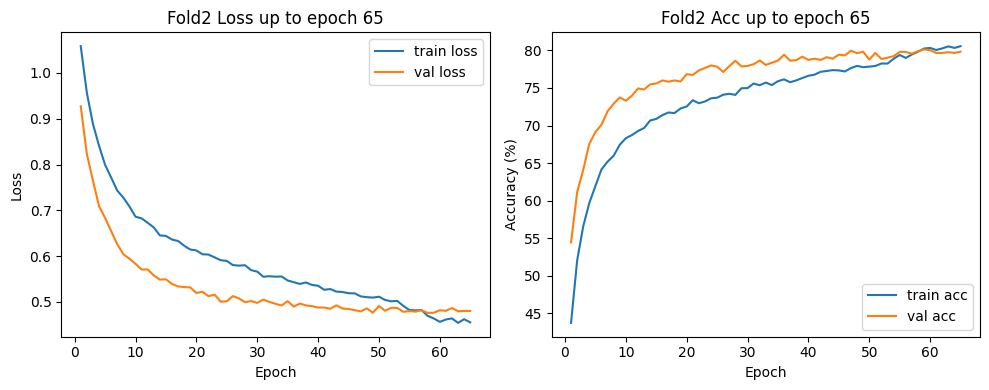

Epoch 66 Train: 80.38%/0.4612  Val: 79.77%/0.4799
Epoch 67 Train: 80.46%/0.4596  Val: 79.63%/0.4858
Epoch 68 Train: 80.50%/0.4541  Val: 80.13%/0.4833
Epoch 69 Train: 80.86%/0.4472  Val: 79.73%/0.4777
Epoch 70 Train: 80.80%/0.4539  Val: 79.67%/0.4758


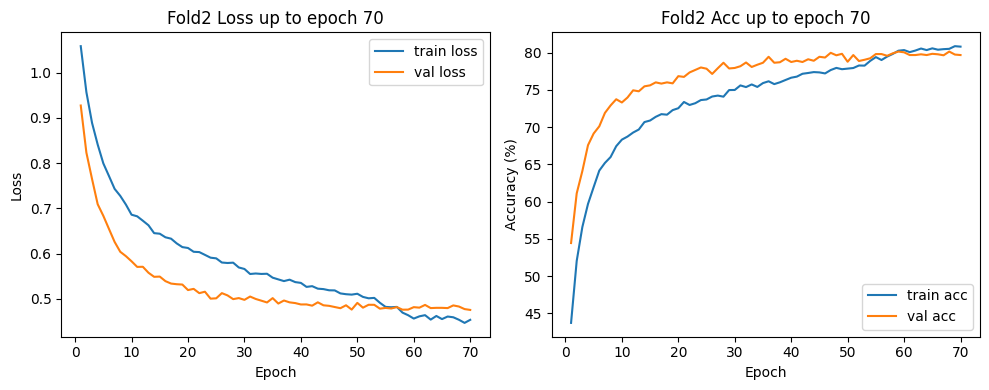

saved best model
Epoch 71 Train: 80.88%/0.4486  Val: 79.77%/0.4790
Epoch 72 Train: 81.01%/0.4481  Val: 79.50%/0.4822
Epoch 73 Train: 80.79%/0.4527  Val: 79.53%/0.4809
Epoch 74 Train: 80.66%/0.4478  Val: 79.80%/0.4821
Epoch 75 Train: 81.10%/0.4460  Val: 79.67%/0.4777


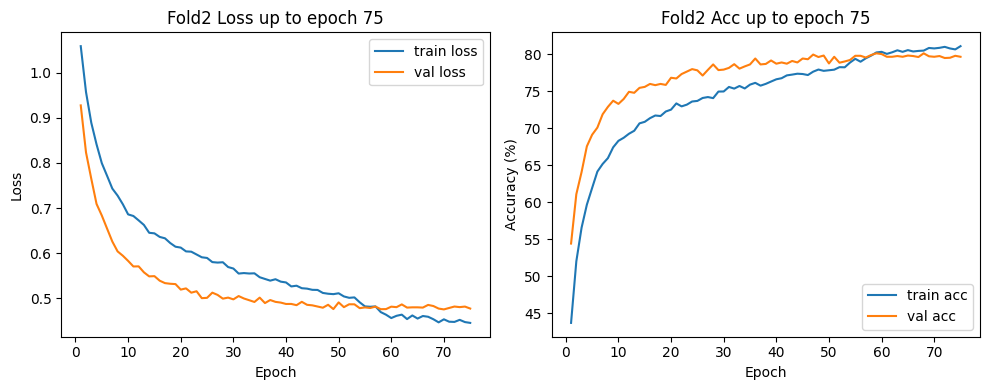

Epoch 76 Train: 80.97%/0.4517  Val: 79.53%/0.4803
Epoch 77 Train: 80.67%/0.4504  Val: 79.73%/0.4821
Epoch 78 Train: 81.37%/0.4442  Val: 79.27%/0.4925
Epoch 79 Train: 80.98%/0.4439  Val: 79.80%/0.4827
Epoch 80 Train: 81.29%/0.4400  Val: 79.93%/0.4798


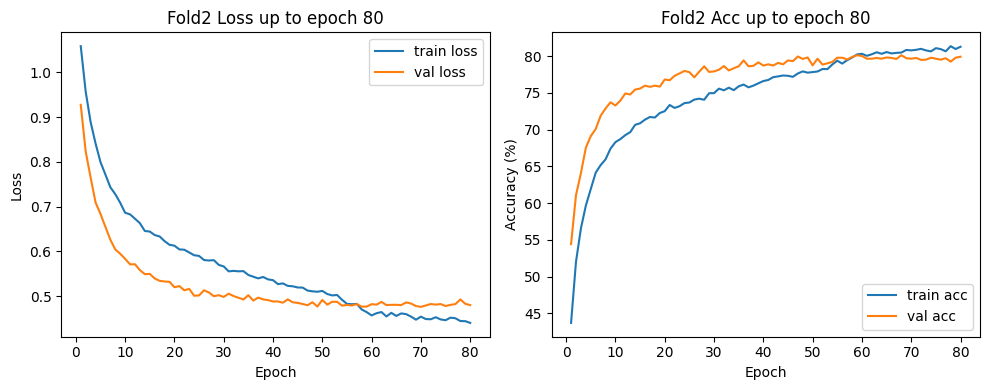

Epoch 81 Train: 81.08%/0.4456  Val: 79.83%/0.4789
Epoch 82 Train: 80.94%/0.4462  Val: 80.00%/0.4886
Epoch 83 Train: 80.88%/0.4469  Val: 79.93%/0.4751
saved best model
Epoch 84 Train: 81.12%/0.4496  Val: 79.87%/0.4812
Epoch 85 Train: 81.08%/0.4433  Val: 79.73%/0.4802


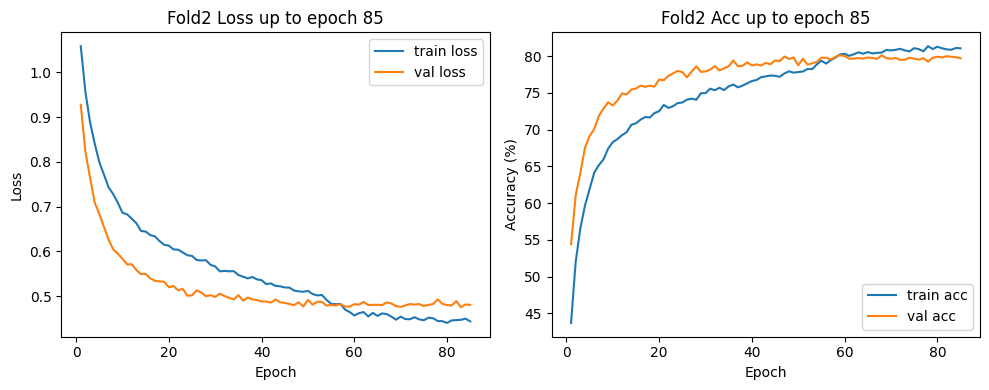

Epoch 86 Train: 81.16%/0.4455  Val: 79.80%/0.4792
Epoch 87 Train: 80.94%/0.4482  Val: 79.83%/0.4769
Epoch 88 Train: 81.11%/0.4451  Val: 79.70%/0.4836
Epoch 89 Train: 80.70%/0.4466  Val: 79.90%/0.4784
Epoch 90 Train: 81.34%/0.4451  Val: 79.70%/0.4801


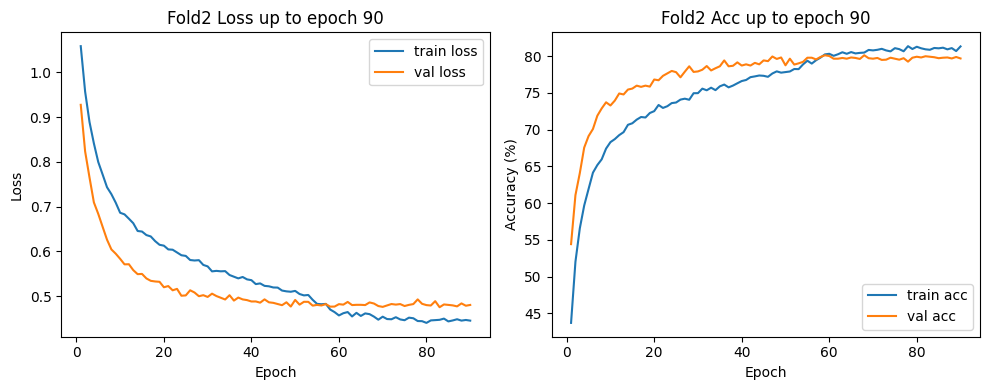

Epoch 91 Train: 81.14%/0.4471  Val: 79.80%/0.4797
Epoch 92 Train: 80.90%/0.4539  Val: 80.17%/0.4766
Epoch 93 Train: 81.01%/0.4447  Val: 79.83%/0.4801
Epoch 94 Train: 81.15%/0.4465  Val: 79.93%/0.4826
Epoch 95 Train: 80.98%/0.4495  Val: 79.80%/0.4826


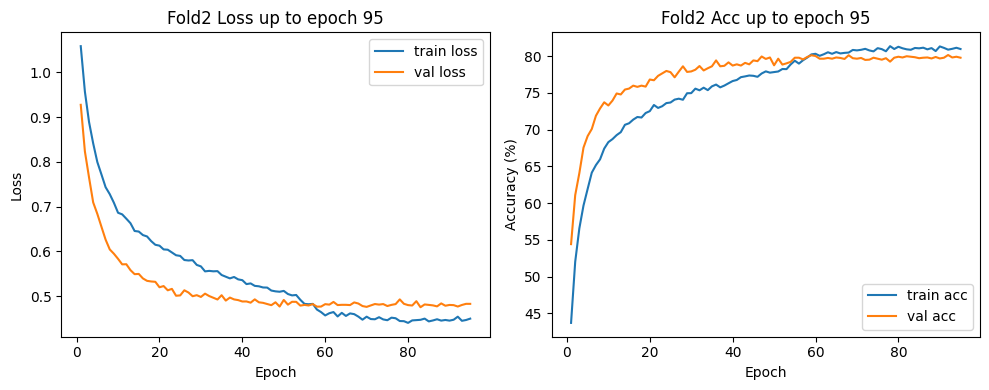

Epoch 96 Train: 81.13%/0.4445  Val: 79.80%/0.4853
Epoch 97 Train: 80.91%/0.4483  Val: 79.83%/0.4826
Epoch 98 Train: 80.58%/0.4545  Val: 79.87%/0.4808
early stopping at epoch 98
Fold 2 best val loss: 0.4751

==== Fold 3 시작 ====
Epoch 01 Train: 42.68%/1.0680  Val: 54.00%/0.9084
saved best model
Epoch 02 Train: 51.92%/0.9450  Val: 60.33%/0.7989
saved best model
Epoch 03 Train: 56.68%/0.8775  Val: 64.63%/0.7522
saved best model
Epoch 04 Train: 60.33%/0.8333  Val: 65.87%/0.7162
saved best model
Epoch 05 Train: 62.00%/0.7933  Val: 68.20%/0.6753


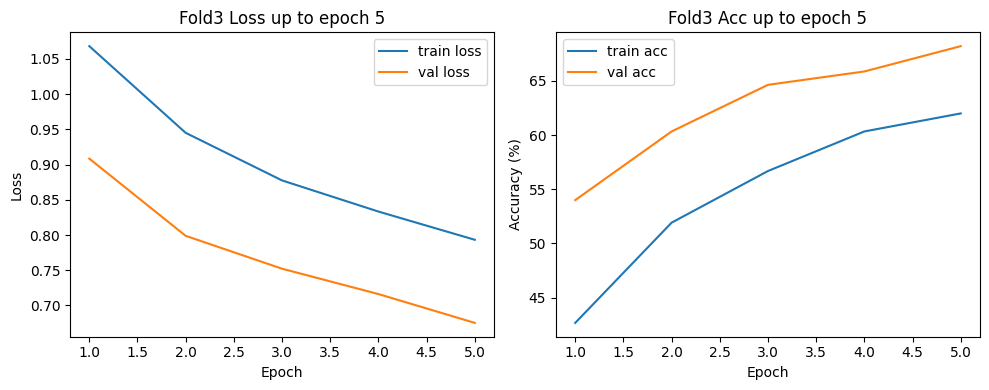

saved best model
Epoch 06 Train: 64.10%/0.7669  Val: 69.67%/0.6460
saved best model
Epoch 07 Train: 65.45%/0.7434  Val: 70.57%/0.6374
saved best model
Epoch 08 Train: 66.61%/0.7198  Val: 72.50%/0.6110
saved best model
Epoch 09 Train: 68.22%/0.6979  Val: 72.57%/0.6019
saved best model
Epoch 10 Train: 69.10%/0.6863  Val: 72.67%/0.5923


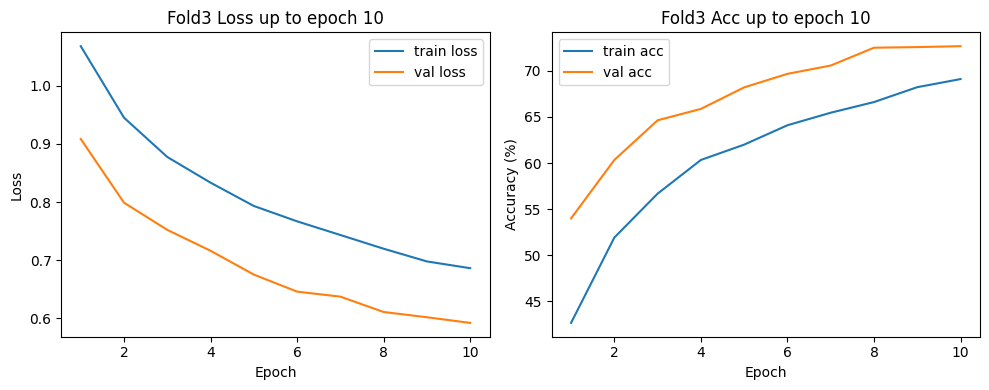

saved best model
Epoch 11 Train: 69.52%/0.6703  Val: 73.83%/0.5768
saved best model
Epoch 12 Train: 70.11%/0.6545  Val: 73.93%/0.5690
saved best model
Epoch 13 Train: 70.47%/0.6539  Val: 74.53%/0.5648
saved best model
Epoch 14 Train: 71.16%/0.6419  Val: 74.53%/0.5635
saved best model
Epoch 15 Train: 71.67%/0.6285  Val: 75.20%/0.5488


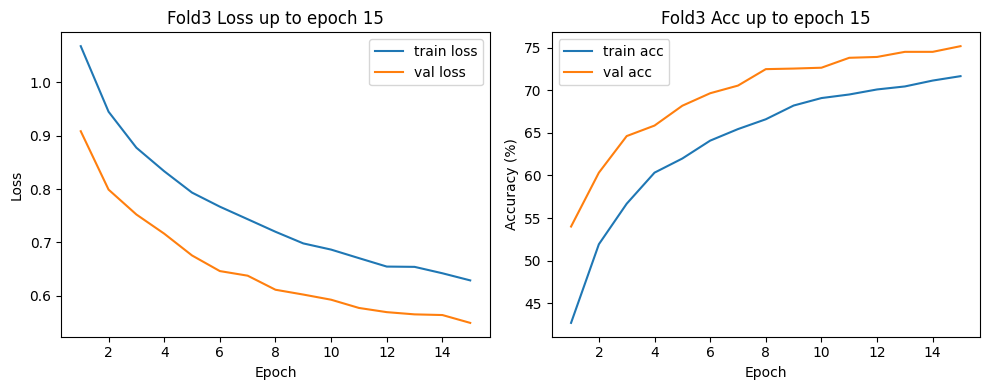

saved best model
Epoch 16 Train: 72.38%/0.6193  Val: 75.27%/0.5498
Epoch 17 Train: 72.40%/0.6207  Val: 75.77%/0.5371
saved best model
Epoch 18 Train: 72.81%/0.6077  Val: 76.80%/0.5334
saved best model
Epoch 19 Train: 73.00%/0.6060  Val: 76.13%/0.5329
saved best model
Epoch 20 Train: 73.56%/0.5946  Val: 76.27%/0.5401


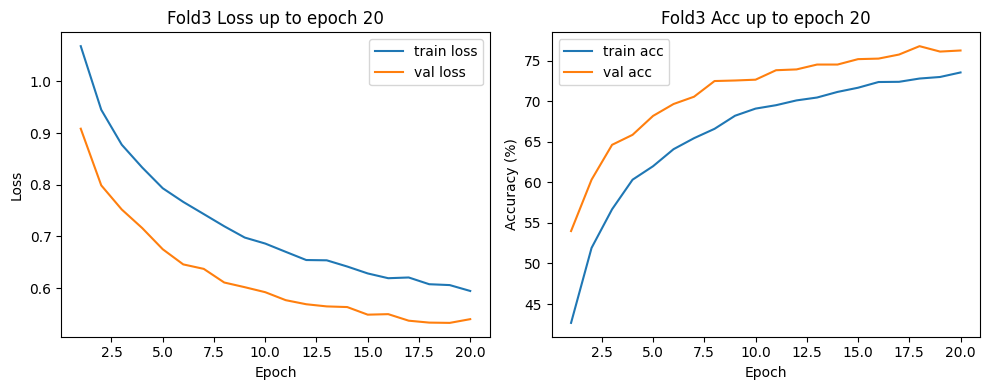

Epoch 21 Train: 73.53%/0.5929  Val: 77.10%/0.5277
saved best model
Epoch 22 Train: 74.05%/0.5854  Val: 76.23%/0.5316
Epoch 23 Train: 73.97%/0.5822  Val: 77.17%/0.5247
saved best model
Epoch 24 Train: 74.28%/0.5775  Val: 76.77%/0.5242
saved best model
Epoch 25 Train: 74.64%/0.5758  Val: 76.80%/0.5315


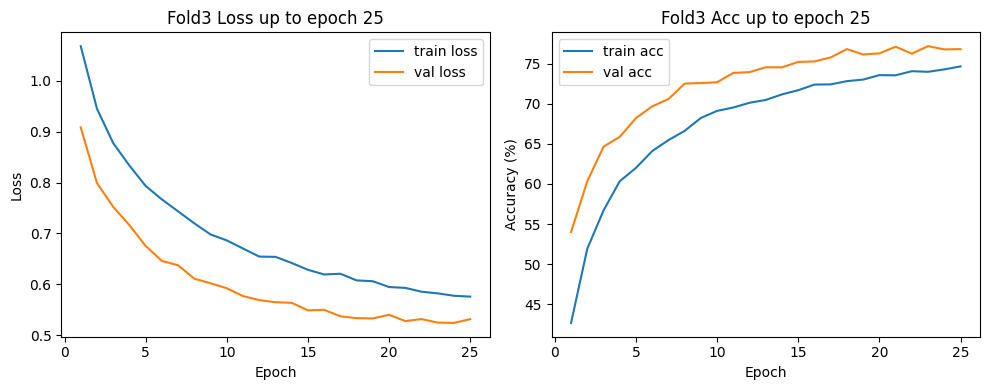

Epoch 26 Train: 74.98%/0.5710  Val: 77.07%/0.5237
saved best model
Epoch 27 Train: 75.24%/0.5604  Val: 77.37%/0.5222
saved best model
Epoch 28 Train: 75.37%/0.5635  Val: 77.27%/0.5161
saved best model
Epoch 29 Train: 75.45%/0.5558  Val: 77.37%/0.5121
saved best model
Epoch 30 Train: 75.57%/0.5517  Val: 76.80%/0.5184


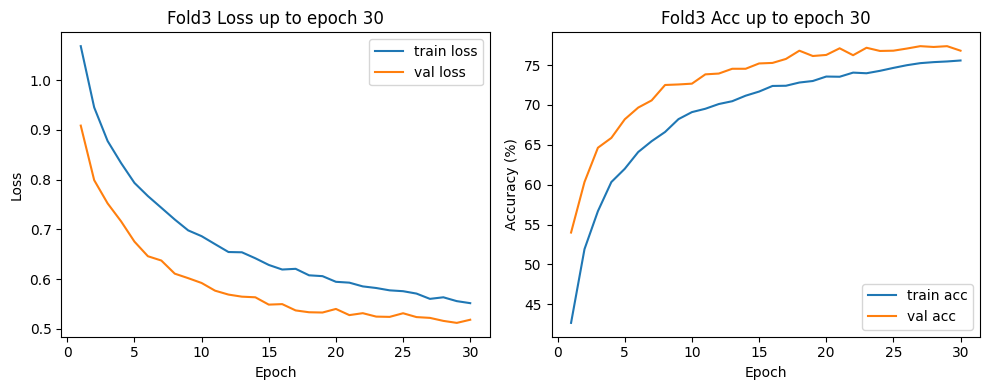

Epoch 31 Train: 75.49%/0.5507  Val: 77.33%/0.5164
Epoch 32 Train: 75.74%/0.5481  Val: 77.57%/0.5186
Epoch 33 Train: 76.09%/0.5436  Val: 77.33%/0.5104
saved best model
Epoch 34 Train: 75.72%/0.5416  Val: 77.37%/0.5141
Epoch 35 Train: 76.79%/0.5299  Val: 77.47%/0.5187


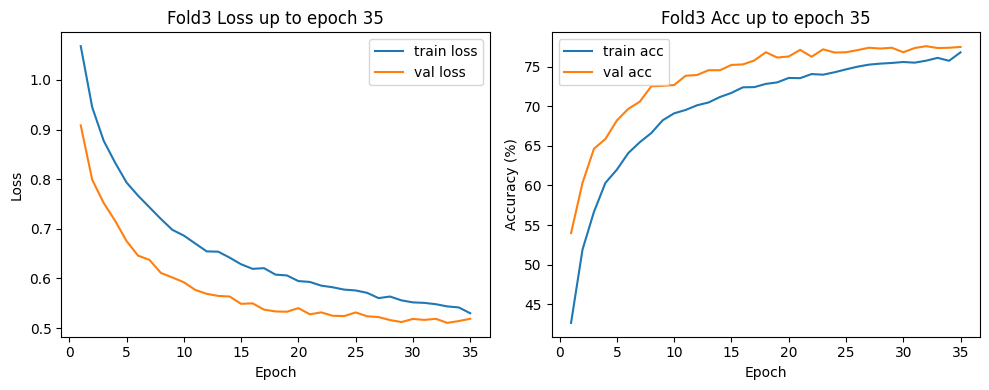

Epoch 36 Train: 76.47%/0.5348  Val: 77.20%/0.5135
Epoch 37 Train: 76.90%/0.5276  Val: 76.97%/0.5204
Epoch 38 Train: 77.57%/0.5179  Val: 78.13%/0.5078
saved best model
Epoch 39 Train: 77.50%/0.5110  Val: 78.03%/0.5125
Epoch 40 Train: 77.98%/0.5069  Val: 77.70%/0.5130


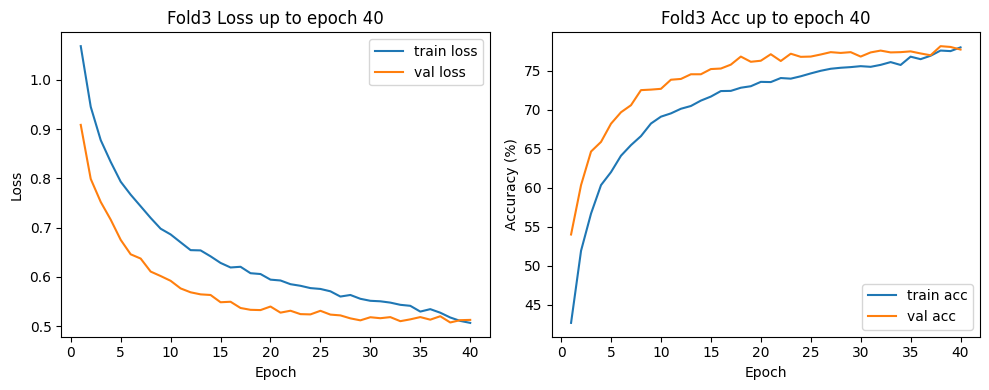

Epoch 41 Train: 78.47%/0.5008  Val: 78.20%/0.5144
Epoch 42 Train: 78.57%/0.5012  Val: 77.93%/0.5109
Epoch 43 Train: 78.34%/0.4967  Val: 77.97%/0.5113
Epoch 44 Train: 78.80%/0.4918  Val: 78.23%/0.5118
Epoch 45 Train: 78.58%/0.4927  Val: 78.67%/0.5094


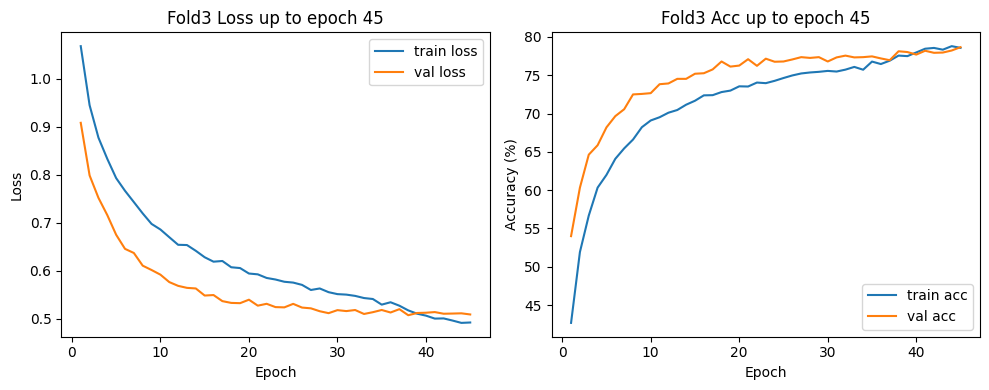

Epoch 46 Train: 78.45%/0.4936  Val: 78.73%/0.5067
saved best model
Epoch 47 Train: 79.23%/0.4840  Val: 78.50%/0.5060
saved best model
Epoch 48 Train: 79.27%/0.4846  Val: 78.20%/0.5096
Epoch 49 Train: 79.25%/0.4835  Val: 78.33%/0.5071
Epoch 50 Train: 79.27%/0.4831  Val: 77.87%/0.5122


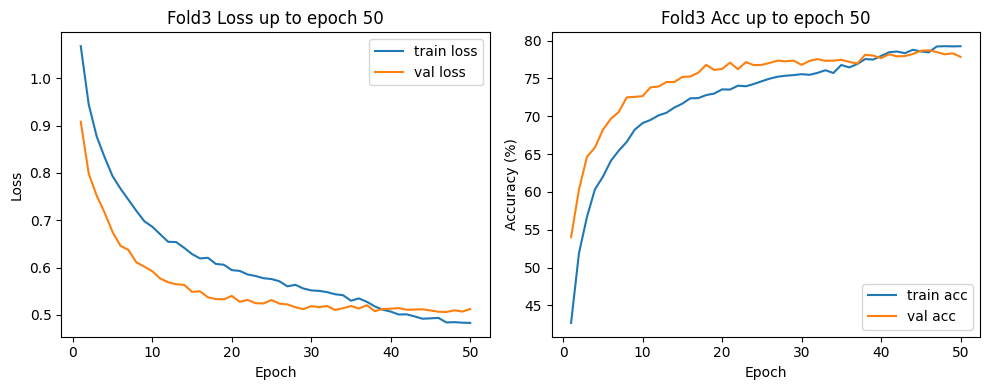

Epoch 51 Train: 79.40%/0.4818  Val: 77.93%/0.5116
Epoch 52 Train: 79.35%/0.4773  Val: 78.20%/0.5081
Epoch 53 Train: 79.37%/0.4826  Val: 78.10%/0.5114
Epoch 54 Train: 79.25%/0.4766  Val: 78.17%/0.5094
Epoch 55 Train: 79.64%/0.4744  Val: 78.07%/0.5140


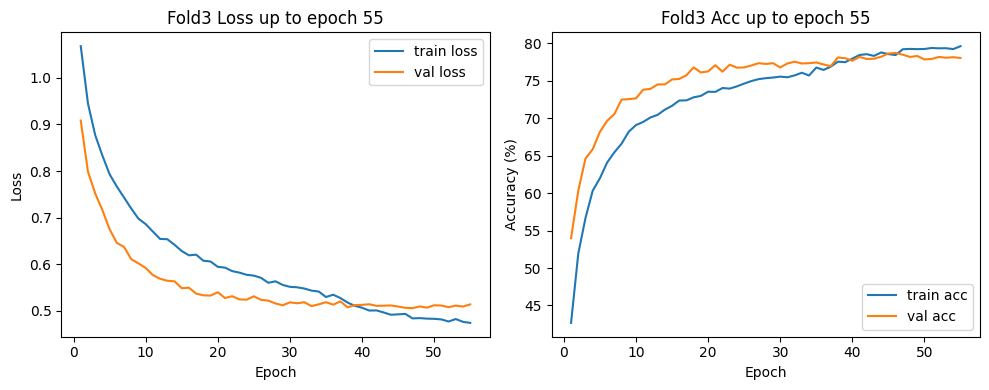

Epoch 56 Train: 79.27%/0.4789  Val: 77.80%/0.5104
Epoch 57 Train: 79.74%/0.4736  Val: 78.23%/0.5097
Epoch 58 Train: 79.55%/0.4711  Val: 78.20%/0.5132
Epoch 59 Train: 79.70%/0.4732  Val: 78.27%/0.5115
Epoch 60 Train: 80.31%/0.4673  Val: 78.03%/0.5116


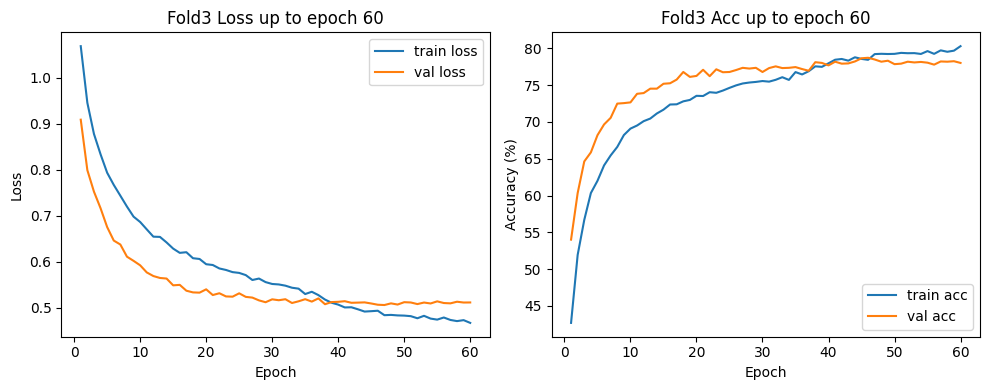

Epoch 61 Train: 79.92%/0.4677  Val: 78.13%/0.5108
Epoch 62 Train: 79.86%/0.4670  Val: 78.27%/0.5165
early stopping at epoch 62
Fold 3 best val loss: 0.5060

==== Fold 4 시작 ====
Epoch 01 Train: 43.36%/1.0582  Val: 55.73%/0.9168
saved best model
Epoch 02 Train: 51.71%/0.9563  Val: 59.23%/0.8173
saved best model
Epoch 03 Train: 56.23%/0.8903  Val: 64.00%/0.7529
saved best model
Epoch 04 Train: 58.83%/0.8433  Val: 67.13%/0.7012
saved best model
Epoch 05 Train: 62.07%/0.7959  Val: 69.23%/0.6592


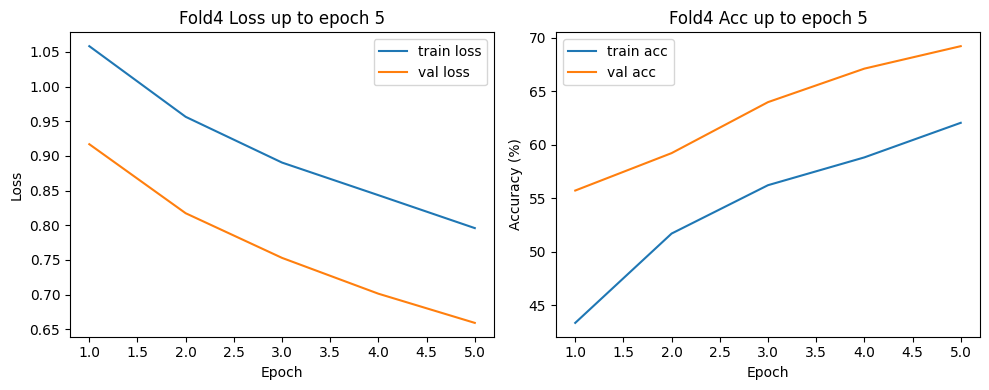

saved best model
Epoch 06 Train: 64.24%/0.7617  Val: 70.00%/0.6385
saved best model
Epoch 07 Train: 65.47%/0.7389  Val: 70.27%/0.6189
saved best model
Epoch 08 Train: 66.62%/0.7240  Val: 72.23%/0.6051
saved best model
Epoch 09 Train: 67.51%/0.7018  Val: 71.93%/0.5902
saved best model
Epoch 10 Train: 68.38%/0.6918  Val: 74.17%/0.5747


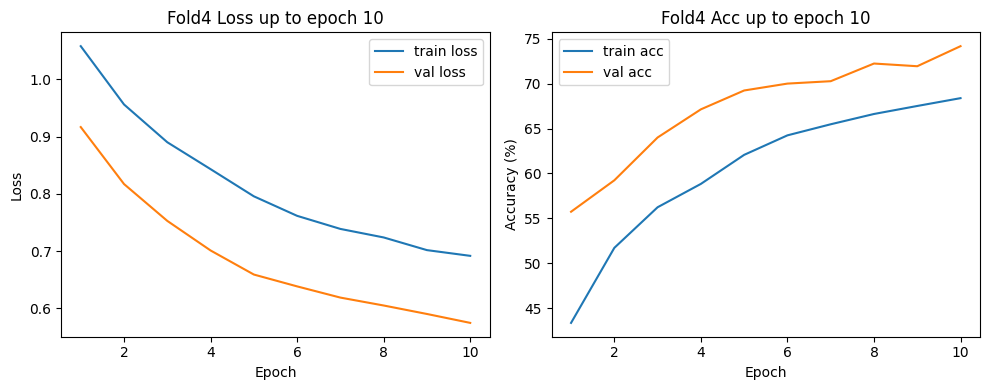

saved best model
Epoch 11 Train: 69.10%/0.6763  Val: 74.10%/0.5621
saved best model
Epoch 12 Train: 69.73%/0.6615  Val: 74.30%/0.5682
Epoch 13 Train: 70.46%/0.6521  Val: 75.00%/0.5549
saved best model
Epoch 14 Train: 70.40%/0.6484  Val: 74.63%/0.5612
Epoch 15 Train: 71.31%/0.6406  Val: 75.40%/0.5451


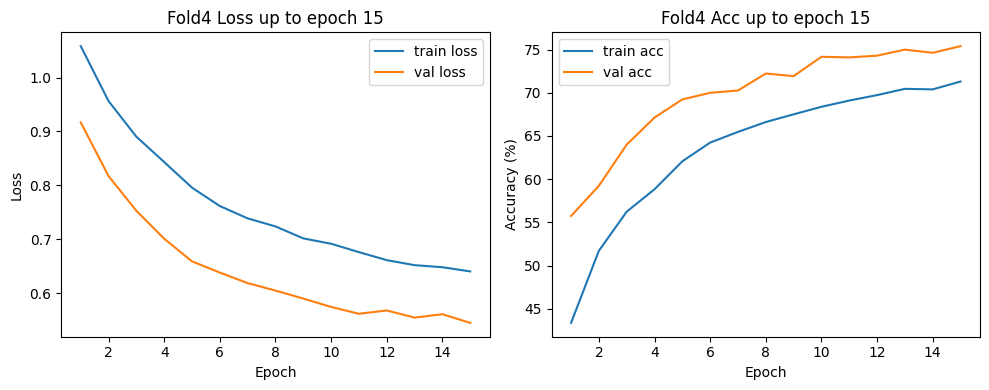

saved best model
Epoch 16 Train: 71.72%/0.6294  Val: 74.30%/0.5557
Epoch 17 Train: 71.88%/0.6268  Val: 75.97%/0.5373
saved best model
Epoch 18 Train: 72.43%/0.6151  Val: 75.53%/0.5345
saved best model
Epoch 19 Train: 72.63%/0.6135  Val: 76.27%/0.5305
saved best model
Epoch 20 Train: 72.94%/0.6020  Val: 75.83%/0.5298


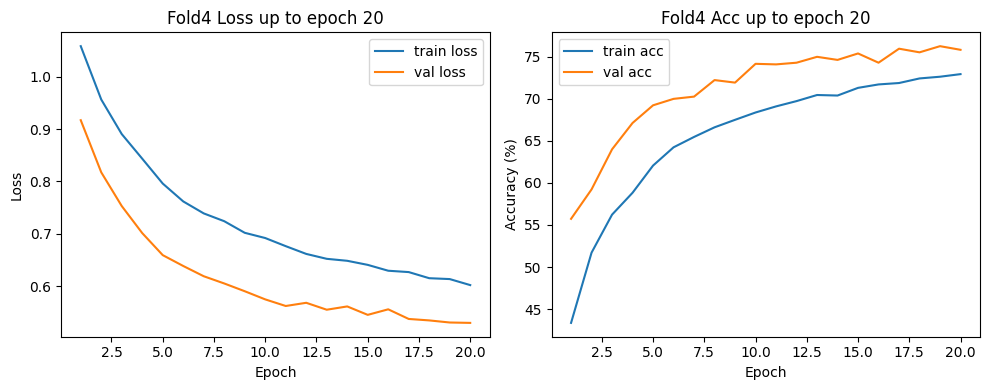

saved best model
Epoch 21 Train: 73.69%/0.5982  Val: 76.07%/0.5284
saved best model
Epoch 22 Train: 73.56%/0.5975  Val: 76.50%/0.5210
saved best model
Epoch 23 Train: 74.11%/0.5841  Val: 76.93%/0.5148
saved best model
Epoch 24 Train: 73.76%/0.5900  Val: 76.50%/0.5156
Epoch 25 Train: 74.45%/0.5768  Val: 76.83%/0.5130


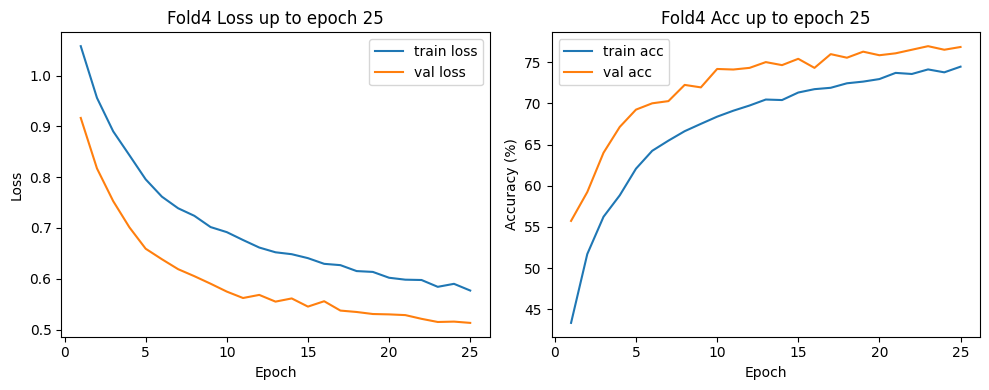

saved best model
Epoch 26 Train: 74.28%/0.5790  Val: 76.07%/0.5224
Epoch 27 Train: 75.14%/0.5704  Val: 76.80%/0.5159
Epoch 28 Train: 75.17%/0.5664  Val: 77.17%/0.5173
Epoch 29 Train: 75.29%/0.5621  Val: 76.10%/0.5232
Epoch 30 Train: 75.75%/0.5503  Val: 77.20%/0.5111


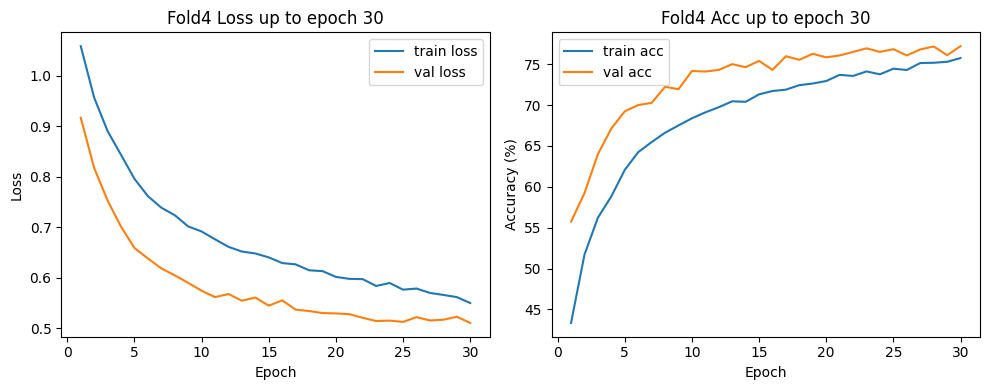

saved best model
Epoch 31 Train: 76.06%/0.5462  Val: 77.47%/0.5123
Epoch 32 Train: 76.31%/0.5402  Val: 77.80%/0.5079
saved best model
Epoch 33 Train: 76.63%/0.5379  Val: 77.53%/0.5073
saved best model
Epoch 34 Train: 76.73%/0.5350  Val: 77.67%/0.5071
saved best model
Epoch 35 Train: 76.94%/0.5351  Val: 77.83%/0.5111


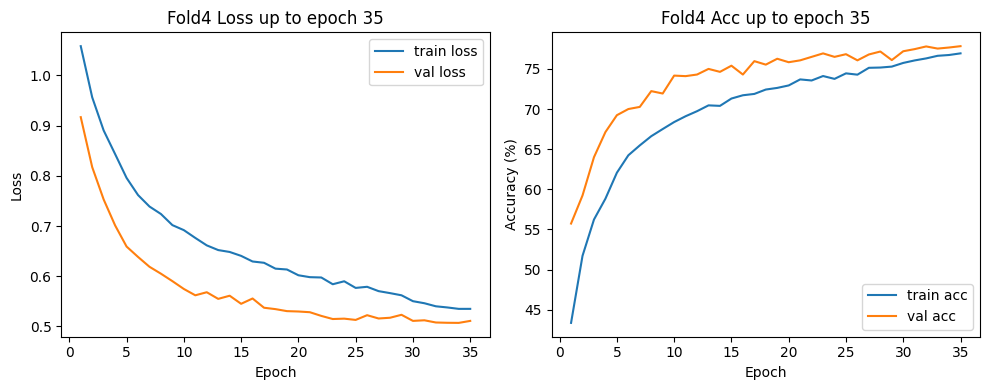

Epoch 36 Train: 77.17%/0.5289  Val: 77.73%/0.5026
saved best model
Epoch 37 Train: 77.19%/0.5258  Val: 77.90%/0.5036
Epoch 38 Train: 77.09%/0.5268  Val: 77.73%/0.5057
Epoch 39 Train: 77.09%/0.5243  Val: 77.97%/0.5012
saved best model
Epoch 40 Train: 77.14%/0.5205  Val: 77.93%/0.5034


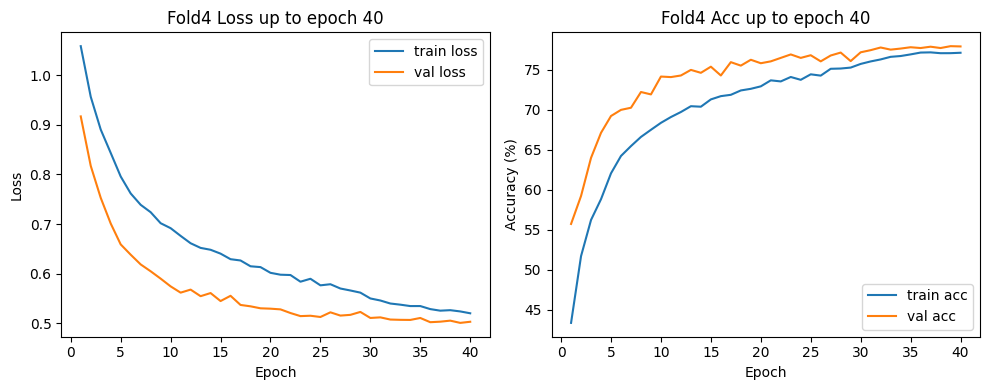

Epoch 41 Train: 77.66%/0.5192  Val: 77.67%/0.5076
Epoch 42 Train: 77.90%/0.5113  Val: 77.90%/0.5102
Epoch 43 Train: 77.61%/0.5116  Val: 77.70%/0.5046
Epoch 44 Train: 77.88%/0.5102  Val: 77.67%/0.5036
Epoch 45 Train: 78.16%/0.5026  Val: 78.27%/0.5068


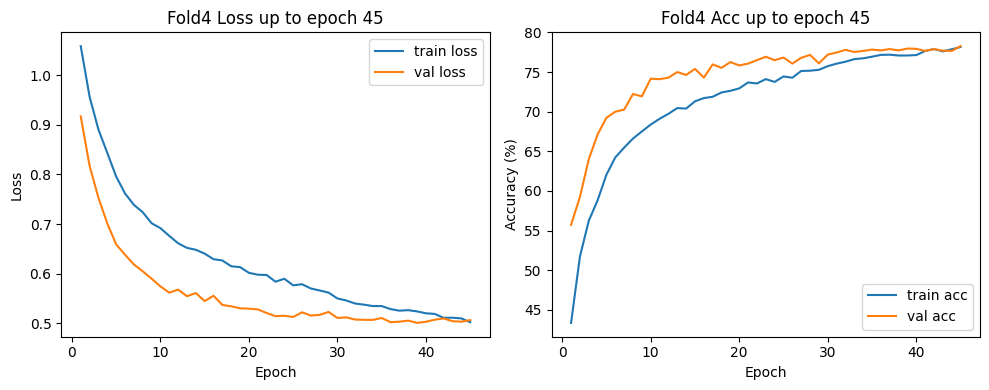

Epoch 46 Train: 78.17%/0.5051  Val: 78.07%/0.5009
saved best model
Epoch 47 Train: 78.68%/0.5012  Val: 77.80%/0.5043
Epoch 48 Train: 78.38%/0.5022  Val: 78.27%/0.5019
Epoch 49 Train: 78.47%/0.4969  Val: 77.37%/0.5120
Epoch 50 Train: 78.38%/0.4944  Val: 78.00%/0.5032


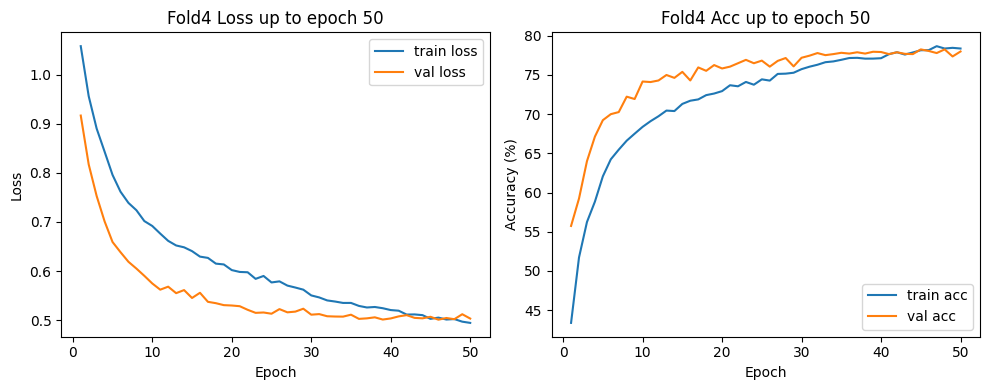

Epoch 51 Train: 78.04%/0.4974  Val: 78.00%/0.4997
saved best model
Epoch 52 Train: 79.02%/0.4919  Val: 77.87%/0.5106
Epoch 53 Train: 78.95%/0.4913  Val: 77.43%/0.5021
Epoch 54 Train: 78.86%/0.4908  Val: 78.00%/0.5097
Epoch 55 Train: 79.02%/0.4890  Val: 77.57%/0.5075


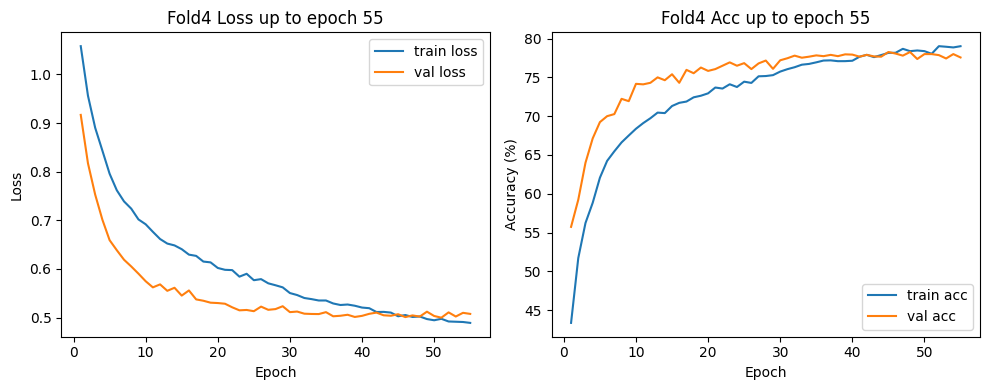

Epoch 56 Train: 79.09%/0.4868  Val: 78.17%/0.5125
Epoch 57 Train: 79.29%/0.4805  Val: 77.77%/0.5048
Epoch 58 Train: 78.75%/0.4902  Val: 78.20%/0.5045
Epoch 59 Train: 79.48%/0.4847  Val: 77.70%/0.5054
Epoch 60 Train: 79.18%/0.4823  Val: 78.00%/0.5058


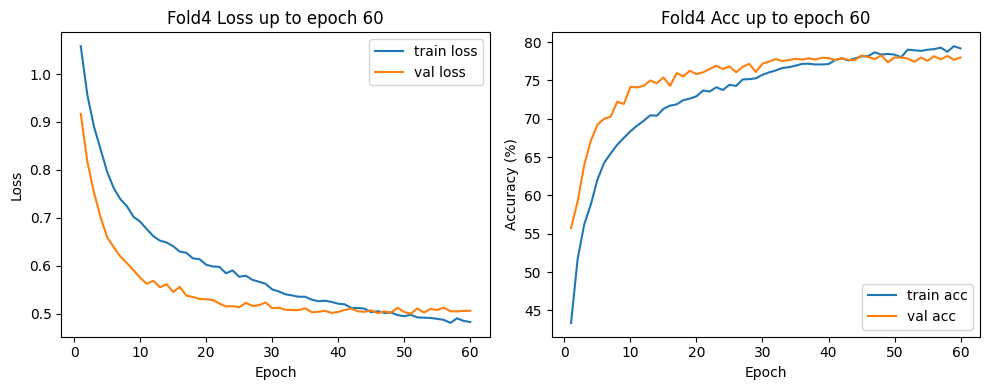

Epoch 61 Train: 78.71%/0.4911  Val: 78.07%/0.5060
Epoch 62 Train: 79.13%/0.4849  Val: 77.93%/0.5018
Epoch 63 Train: 79.07%/0.4881  Val: 77.77%/0.5029
Epoch 64 Train: 79.26%/0.4819  Val: 78.23%/0.5062
Epoch 65 Train: 79.33%/0.4825  Val: 78.00%/0.5012


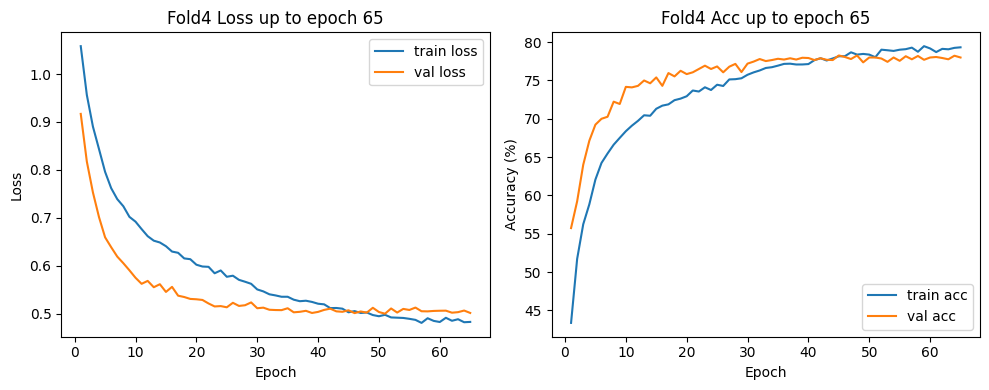

Epoch 66 Train: 78.75%/0.4881  Val: 77.97%/0.5041
early stopping at epoch 66
Fold 4 best val loss: 0.4997

==== Fold 5 시작 ====
Epoch 01 Train: 43.07%/1.0700  Val: 52.37%/0.9617
saved best model
Epoch 02 Train: 50.75%/0.9727  Val: 58.43%/0.8380
saved best model
Epoch 03 Train: 56.05%/0.8908  Val: 62.90%/0.7672
saved best model
Epoch 04 Train: 59.66%/0.8388  Val: 65.00%/0.7303
saved best model
Epoch 05 Train: 62.48%/0.7897  Val: 66.63%/0.6938


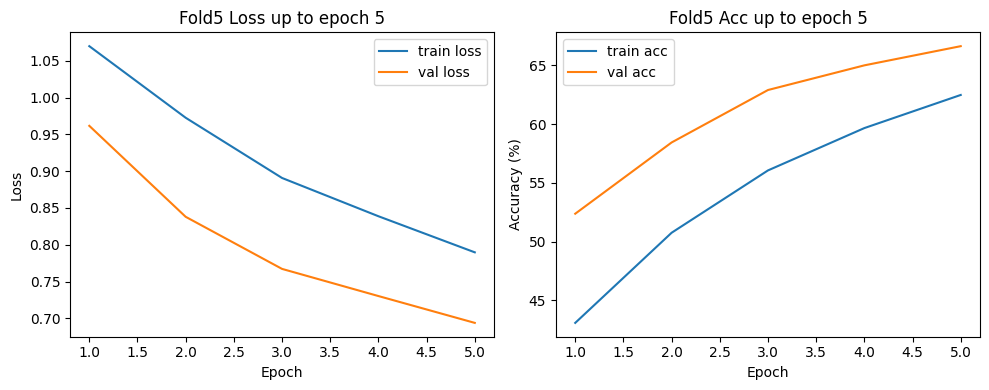

saved best model
Epoch 06 Train: 64.30%/0.7623  Val: 68.63%/0.6726
saved best model
Epoch 07 Train: 65.60%/0.7360  Val: 70.43%/0.6487
saved best model
Epoch 08 Train: 66.97%/0.7164  Val: 71.27%/0.6235
saved best model
Epoch 09 Train: 67.89%/0.6982  Val: 72.27%/0.6121
saved best model
Epoch 10 Train: 68.57%/0.6805  Val: 73.03%/0.5982


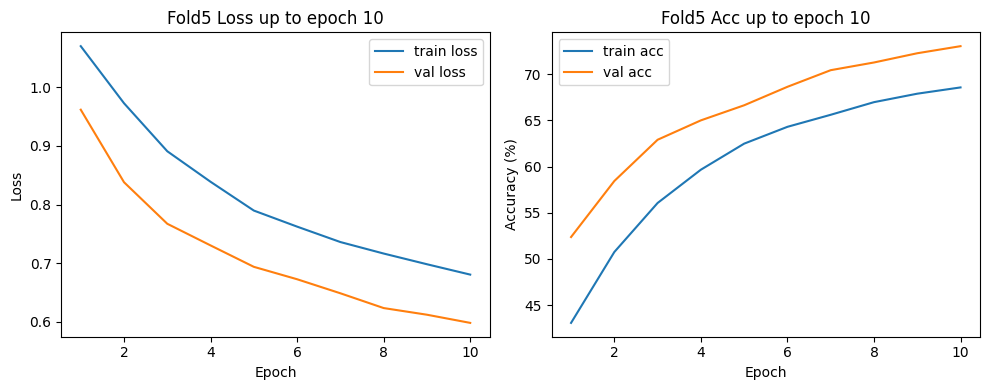

saved best model
Epoch 11 Train: 69.53%/0.6698  Val: 72.37%/0.6012
Epoch 12 Train: 69.92%/0.6597  Val: 73.67%/0.5814
saved best model
Epoch 13 Train: 70.52%/0.6461  Val: 73.67%/0.5822
Epoch 14 Train: 71.33%/0.6383  Val: 74.57%/0.5728
saved best model
Epoch 15 Train: 71.90%/0.6276  Val: 74.83%/0.5711


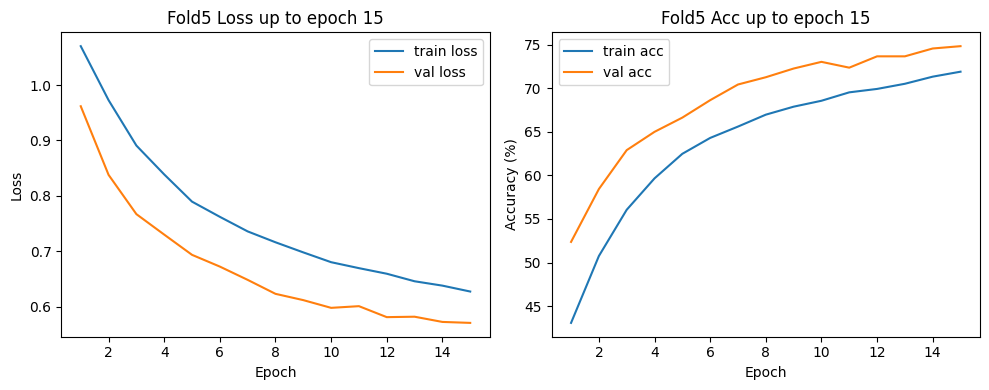

saved best model
Epoch 16 Train: 71.97%/0.6211  Val: 74.77%/0.5652
saved best model
Epoch 17 Train: 72.88%/0.6085  Val: 74.77%/0.5658
Epoch 18 Train: 72.79%/0.6098  Val: 75.47%/0.5522
saved best model
Epoch 19 Train: 73.27%/0.6060  Val: 75.50%/0.5529
Epoch 20 Train: 73.55%/0.5963  Val: 74.93%/0.5541


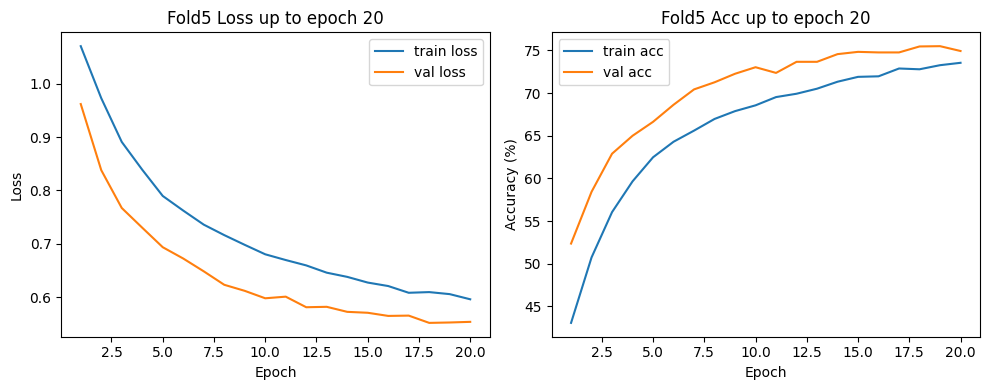

Epoch 21 Train: 73.89%/0.5890  Val: 75.33%/0.5538
Epoch 22 Train: 73.84%/0.5876  Val: 75.10%/0.5543
Epoch 23 Train: 74.71%/0.5712  Val: 76.03%/0.5380
saved best model
Epoch 24 Train: 74.70%/0.5677  Val: 76.23%/0.5330
saved best model
Epoch 25 Train: 75.67%/0.5580  Val: 76.63%/0.5322


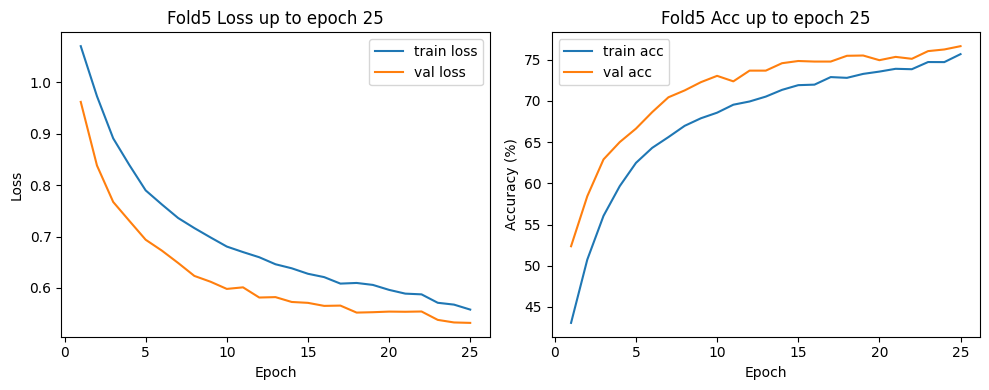

saved best model
Epoch 26 Train: 75.85%/0.5543  Val: 76.33%/0.5303
saved best model
Epoch 27 Train: 76.00%/0.5491  Val: 76.30%/0.5310
Epoch 28 Train: 75.93%/0.5475  Val: 76.60%/0.5269
saved best model
Epoch 29 Train: 75.95%/0.5498  Val: 76.37%/0.5271
Epoch 30 Train: 76.27%/0.5410  Val: 76.67%/0.5292


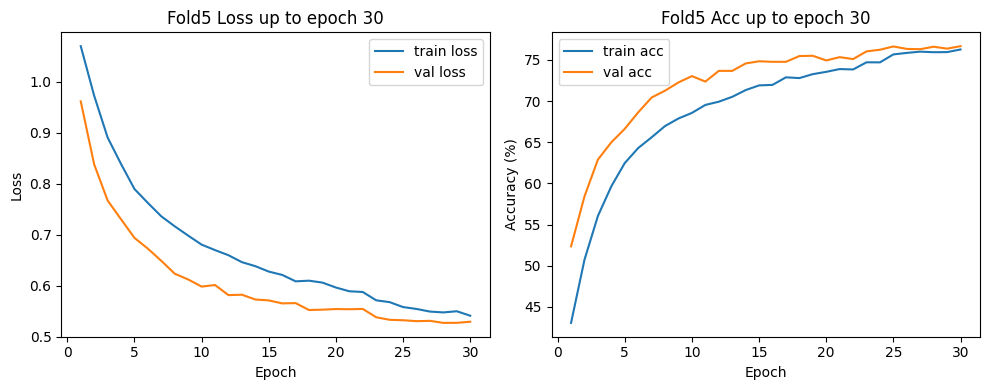

Epoch 31 Train: 76.43%/0.5378  Val: 77.23%/0.5229
saved best model
Epoch 32 Train: 76.30%/0.5416  Val: 76.43%/0.5327
Epoch 33 Train: 76.20%/0.5399  Val: 77.13%/0.5245
Epoch 34 Train: 76.74%/0.5327  Val: 76.73%/0.5253
Epoch 35 Train: 76.47%/0.5348  Val: 77.07%/0.5230


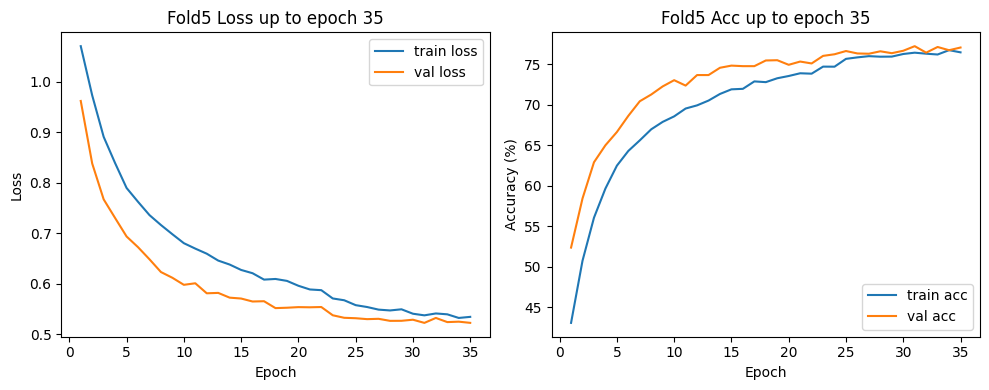

Epoch 36 Train: 76.95%/0.5300  Val: 77.23%/0.5216
saved best model
Epoch 37 Train: 76.99%/0.5282  Val: 77.23%/0.5176
saved best model
Epoch 38 Train: 76.97%/0.5198  Val: 76.87%/0.5216
Epoch 39 Train: 77.56%/0.5168  Val: 77.30%/0.5176
Epoch 40 Train: 77.72%/0.5138  Val: 77.33%/0.5201


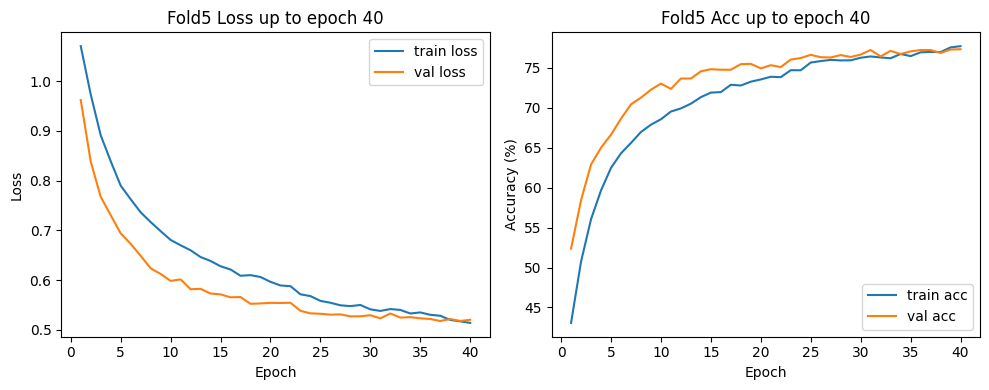

Epoch 41 Train: 77.65%/0.5112  Val: 77.63%/0.5182
Epoch 42 Train: 77.80%/0.5112  Val: 77.70%/0.5190
Epoch 43 Train: 77.65%/0.5120  Val: 77.47%/0.5157
saved best model
Epoch 44 Train: 78.12%/0.5067  Val: 77.50%/0.5143
saved best model
Epoch 45 Train: 78.03%/0.5086  Val: 77.40%/0.5144


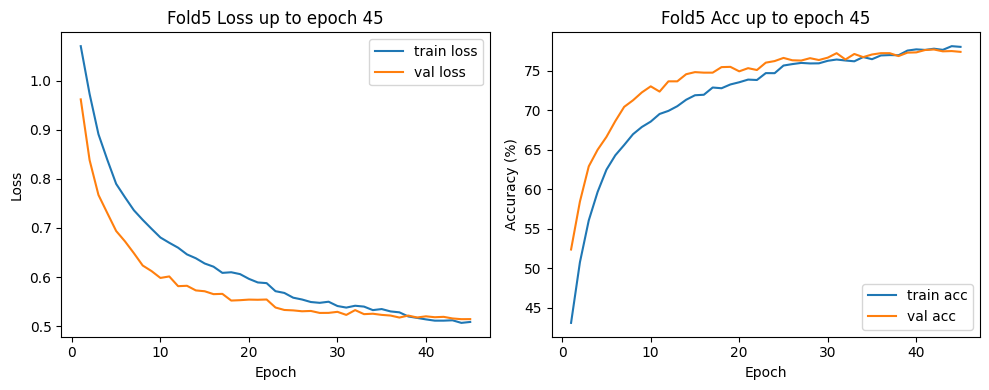

Epoch 46 Train: 78.44%/0.5060  Val: 77.73%/0.5134
saved best model
Epoch 47 Train: 78.12%/0.5096  Val: 77.60%/0.5208
Epoch 48 Train: 78.39%/0.5030  Val: 77.10%/0.5148
Epoch 49 Train: 77.90%/0.5097  Val: 76.67%/0.5216
Epoch 50 Train: 78.11%/0.5051  Val: 77.30%/0.5177


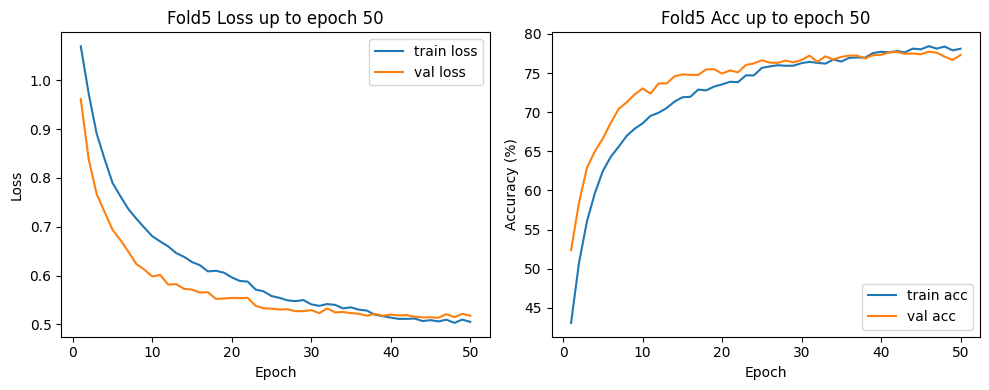

Epoch 51 Train: 78.12%/0.4996  Val: 77.60%/0.5164
Epoch 52 Train: 78.05%/0.5010  Val: 77.50%/0.5160
Epoch 53 Train: 78.27%/0.4989  Val: 77.30%/0.5174
Epoch 54 Train: 78.15%/0.5045  Val: 76.97%/0.5175
Epoch 55 Train: 78.46%/0.4980  Val: 77.27%/0.5160


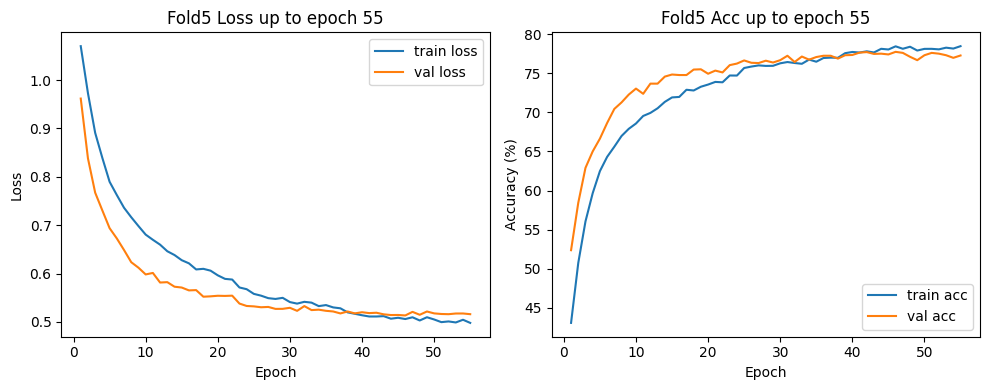

Epoch 56 Train: 78.50%/0.5024  Val: 77.23%/0.5160
Epoch 57 Train: 78.10%/0.5019  Val: 77.23%/0.5176
Epoch 58 Train: 78.60%/0.4967  Val: 77.87%/0.5191
Epoch 59 Train: 78.36%/0.5009  Val: 77.13%/0.5182
Epoch 60 Train: 78.16%/0.5027  Val: 77.40%/0.5167


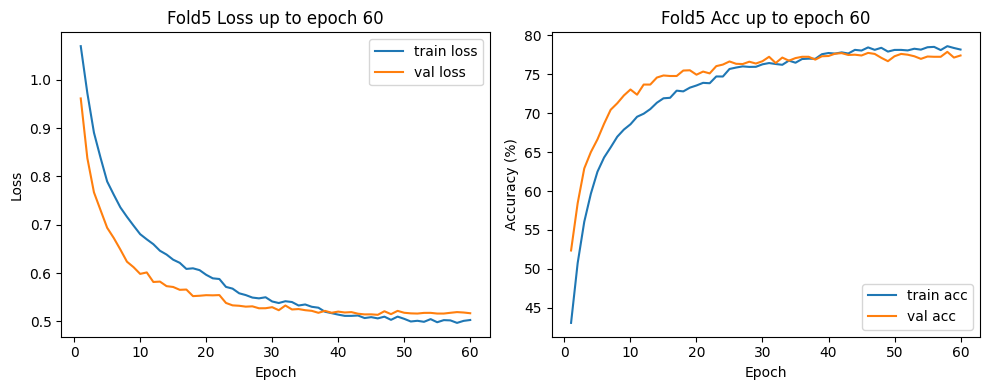

Epoch 61 Train: 78.44%/0.4998  Val: 77.33%/0.5200
early stopping at epoch 61
Fold 5 best val loss: 0.5134
Epoch01 Loss: 1.0468
saved final full model
Epoch02 Loss: 0.9025
saved final full model
Epoch03 Loss: 0.8390
saved final full model
Epoch04 Loss: 0.7974
saved final full model
Epoch05 Loss: 0.7680


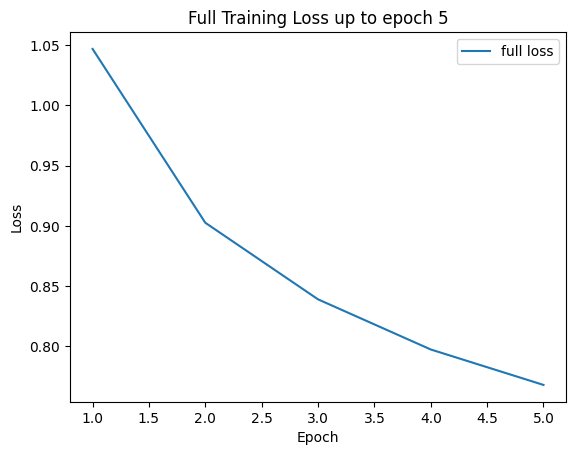

saved final full model
Epoch06 Loss: 0.7404
saved final full model
Epoch07 Loss: 0.7155
saved final full model
Epoch08 Loss: 0.6946
saved final full model
Epoch09 Loss: 0.6792
saved final full model
Epoch10 Loss: 0.6681


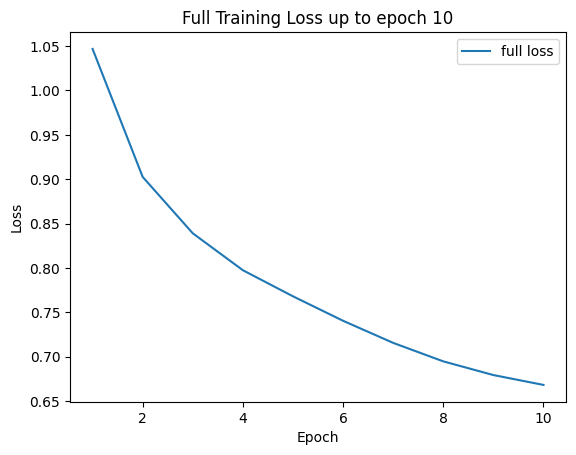

saved final full model
Epoch11 Loss: 0.6591
saved final full model


KeyboardInterrupt: 

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from sklearn.model_selection import StratifiedKFold
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# 1) 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classes = ['Happy','Neutral','Sad']

# 2) Transform
raw_tf = transforms.ToTensor()
aug_tf = transforms.Compose([
    transforms.RandomAffine(15, translate=(0.1,0.1), shear=0.1, scale=(0.9,1.1),
                            interpolation=transforms.InterpolationMode.NEAREST, fill=0),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

# 3) Dataset 정의
class FacialDataset(Dataset):
    def __init__(self, paths, labels, transform):
        self.paths = paths
        self.labels = labels
        self.transform = transform
    def __len__(self):
        return len(self.paths)
    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert('RGB')
        img = self.transform(img)
        return img, torch.tensor(self.labels[idx], dtype=torch.long)

# 4) 모델 정의
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3,16,3), nn.BatchNorm2d(16), nn.ReLU(),
            nn.Conv2d(16,16,3), nn.BatchNorm2d(16), nn.ReLU(),
            nn.Dropout2d(0.3), nn.MaxPool2d(3,2),

            nn.Conv2d(16,32,3), nn.BatchNorm2d(32), nn.ReLU(),
            nn.Conv2d(32,32,3), nn.BatchNorm2d(32), nn.ReLU(),
            nn.Dropout2d(0.3), nn.MaxPool2d(3,2),

            nn.Conv2d(32,64,3), nn.BatchNorm2d(64), nn.ReLU(),
            nn.Conv2d(64,64,3), nn.BatchNorm2d(64), nn.ReLU(),
            nn.Dropout2d(0.3), nn.MaxPool2d(3,2),

            nn.Conv2d(64,128,3), nn.BatchNorm2d(128), nn.ReLU(),
            nn.Conv2d(128,128,3), nn.BatchNorm2d(128), nn.ReLU(),
            nn.Dropout2d(0.3), nn.MaxPool2d(3,2),
        )
        self.fc1 = nn.Linear(128*5*5, 128)
        self.bn1 = nn.BatchNorm1d(128); self.relu1 = nn.ReLU(); self.drop1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128,64)
        self.bn2 = nn.BatchNorm1d(64);  self.relu2 = nn.ReLU(); self.drop2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64,3)
    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.drop1(self.relu1(self.bn1(self.fc1(x))))
        x = self.drop2(self.relu2(self.bn2(self.fc2(x))))
        return self.fc3(x)

# 5) 파일 및 레이블 수집
file_paths, labels = [], []
for idx, cls in enumerate(classes):
    cls_dir = os.path.join(train_path, cls)
    for fn in os.listdir(cls_dir):
        file_paths.append(os.path.join(cls_dir, fn))
        labels.append(idx)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
max_epochs = 100

for fold, (train_idx, val_idx) in enumerate(skf.split(file_paths, labels), 1):
    # 이미 Fold 1을 수행했으면 건너뛰고 싶을 때:
    # if fold == 1:
    #     continue

    print(f'\n==== Fold {fold} 시작 ====')

    # fold별 metric 리스트 초기화
    train_losses, val_losses = [], []
    train_accs,    val_accs   = [], []

    # 데이터 분할
    train_paths = [file_paths[i] for i in train_idx]
    train_labels= [labels[i]     for i in train_idx]
    val_paths   = [file_paths[i] for i in val_idx]
    val_labels  = [labels[i]     for i in val_idx]

    train_ds = ConcatDataset([
        FacialDataset(train_paths, train_labels, transform=raw_tf),
        FacialDataset(train_paths, train_labels, transform=aug_tf),
    ])
    val_ds   = FacialDataset(val_paths, val_labels, transform=raw_tf)

    train_loader = DataLoader(train_ds, batch_size=32, shuffle=True,  num_workers=12, pin_memory=True)
    val_loader   = DataLoader(val_ds,   batch_size=32, shuffle=False, num_workers=12, pin_memory=True)

    # 모델·옵티마이저·스케줄러 설정
    model     = Net().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

    best_val_loss = float('inf')
    epochs_no_imp = 0
    patience      = 15

    for epoch in range(1, max_epochs+1):
        # — train
        model.train()
        running, corr, tot = 0.0, 0, 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out  = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            running += loss.item()*x.size(0)
            corr    += (out.argmax(1)==y).sum().item()
            tot    += x.size(0)
        train_loss = running/tot
        train_acc  = corr/tot*100

        # — validate
        model.eval()
        running, corr, tot = 0.0, 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                out  = model(x)
                loss = criterion(out, y)
                running += loss.item()*x.size(0)
                corr    += (out.argmax(1)==y).sum().item()
                tot    += x.size(0)
        val_loss = running/tot
        val_acc  = corr/tot*100

        scheduler.step(val_loss)

        # metric 저장
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print(f'Epoch {epoch:02d} Train: {train_acc:5.2f}%/{train_loss:.4f}  '
              f'Val: {val_acc:5.2f}%/{val_loss:.4f}')

        # 5 에폭마다 그래프
        if epoch % 5 == 0:
            epochs = list(range(1, epoch+1))
            plt.figure(figsize=(10,4))

            plt.subplot(1,2,1)
            plt.plot(epochs, train_losses, label='train loss')
            plt.plot(epochs, val_losses,   label='val loss')
            plt.title(f'Fold{fold} Loss up to epoch {epoch}')
            plt.xlabel('Epoch'); plt.ylabel('Loss')
            plt.legend()

            plt.subplot(1,2,2)
            plt.plot(epochs, train_accs, label='train acc')
            plt.plot(epochs, val_accs,   label='val acc')
            plt.title(f'Fold{fold} Acc up to epoch {epoch}')
            plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)')
            plt.legend()

            plt.tight_layout()
            plt.show()

        # early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_imp = 0
            torch.save(model, f'best_model_fold{fold}.pth')
            print('saved best model')
        else:
            epochs_no_imp += 1
            if epochs_no_imp >= patience:
                print(f'early stopping at epoch {epoch}')
                break

    print(f'Fold {fold} best val loss: {best_val_loss:.4f}')


In [ ]:

# 1) 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classes = ['Happy','Neutral','Sad']

# 2) Transform
raw_tf = transforms.ToTensor()
aug_tf = transforms.Compose([
    transforms.RandomAffine(15, translate=(0.1,0.1), shear=0.1, scale=(0.9,1.1),
                            interpolation=transforms.InterpolationMode.NEAREST, fill=0),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])
# 5) 파일 및 레이블 수집
file_paths, labels = [], []
for idx, cls in enumerate(classes):
    cls_dir = os.path.join(train_path, cls)
    for fn in os.listdir(cls_dir):
        file_paths.append(os.path.join(cls_dir, fn))
        labels.append(idx)
# 3) Dataset 정의
class FacialDataset(Dataset):
    def __init__(self, paths, labels, transform):
        self.paths = paths
        self.labels = labels
        self.transform = transform
    def __len__(self):
        return len(self.paths)
    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert('RGB')
        img = self.transform(img)
        return img, torch.tensor(self.labels[idx], dtype=torch.long)

full_ds = ConcatDataset([
    FacialDataset(file_paths, labels, transform=raw_tf),
    FacialDataset(file_paths, labels, transform=aug_tf),
])
full_loader = DataLoader(
    full_ds,
    batch_size=32,
    shuffle=True,
    num_workers=12,
    pin_memory=True
)

final_model = torch.load('/content/best_model_fold2.pth',weights_only= False)
final_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(final_model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

best_loss   = float('inf')
full_losses = []

for epoch in range(1, max_epochs+1):
    final_model.train()
    running, tot = 0.0, 0

    for x, y in full_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        out  = final_model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        running += loss.item() * x.size(0)
        tot     += x.size(0)

    epoch_loss = running / tot
    full_losses.append(epoch_loss)
    scheduler.step(epoch_loss)

    print(f'Epoch {epoch:02d}  Loss: {epoch_loss:.4f}')


    # 개선되면 저장
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        torch.save(final_model, '/content/drive/MyDrive/Model_2270085_최연재')


In [ ]:
# 이미 만들어져 있을 수 있으니, 혹시 모를 충돌 방지를 위해 삭제
!rm -rf /content/cropped_faces

# Drive에서 복사
!cp "/content/drive/MyDrive/pattern_term_project/cropped_faces.zip" "/content/"

# cropped_faces 폴더 아래에 압축 풀기
!unzip -q "/content/cropped_faces.zip" -d "/content/cropped_faces"

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os

# 1. 데이터 경로 및 클래스
test_dir = '/content/cropped_faces'
emotion_classes = ['Happy', 'Neutral', 'Sad']

# 2. Transform (160x160 이미지를 그대로 쓰므로)
test_transform = transforms.Compose([
    transforms.ToTensor(),
])

# 3. Dataset 및 DataLoader
test_dataset = datasets.ImageFolder(root=test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# 4) 모델 정의
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3,16,3), nn.BatchNorm2d(16), nn.ReLU(),
            nn.Conv2d(16,16,3), nn.BatchNorm2d(16), nn.ReLU(),
            nn.Dropout2d(0.3), nn.MaxPool2d(3,2),

            nn.Conv2d(16,32,3), nn.BatchNorm2d(32), nn.ReLU(),
            nn.Conv2d(32,32,3), nn.BatchNorm2d(32), nn.ReLU(),
            nn.Dropout2d(0.3), nn.MaxPool2d(3,2),

            nn.Conv2d(32,64,3), nn.BatchNorm2d(64), nn.ReLU(),
            nn.Conv2d(64,64,3), nn.BatchNorm2d(64), nn.ReLU(),
            nn.Dropout2d(0.3), nn.MaxPool2d(3,2),

            nn.Conv2d(64,128,3), nn.BatchNorm2d(128), nn.ReLU(),
            nn.Conv2d(128,128,3), nn.BatchNorm2d(128), nn.ReLU(),
            nn.Dropout2d(0.3), nn.MaxPool2d(3,2),
        )
        self.fc1 = nn.Linear(128*5*5, 128)
        self.bn1 = nn.BatchNorm1d(128); self.relu1 = nn.ReLU(); self.drop1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128,64)
        self.bn2 = nn.BatchNorm1d(64);  self.relu2 = nn.ReLU(); self.drop2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64,3)
    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.drop1(self.relu1(self.bn1(self.fc1(x))))
        x = self.drop2(self.relu2(self.bn2(self.fc2(x))))
        return self.fc3(x)

model = Net()
# 4. 모델 로딩
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
model = torch.load('/content/best_model_fold2.pth',weights_only= False)
model.eval()

# 5. 평가 (정확도 측정 + 예측 결과 저장)
correct = 0
total = 0
pred_labels = []
true_labels = []
file_paths  = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = outputs.max(1)

        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

        pred_labels.extend(preds.cpu().tolist())
        true_labels.extend(labels.cpu().tolist())

# 6. 정확도 출력
test_acc = correct / total * 100
print(f"✅ Test Accuracy: {test_acc:.2f}%")

# confusion matrix 만들기
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:\n", cm)

✅ Test Accuracy: 84.80%
Confusion Matrix:
 [[1858   96   46]
 [  14 1618  368]
 [  61  327 1612]]


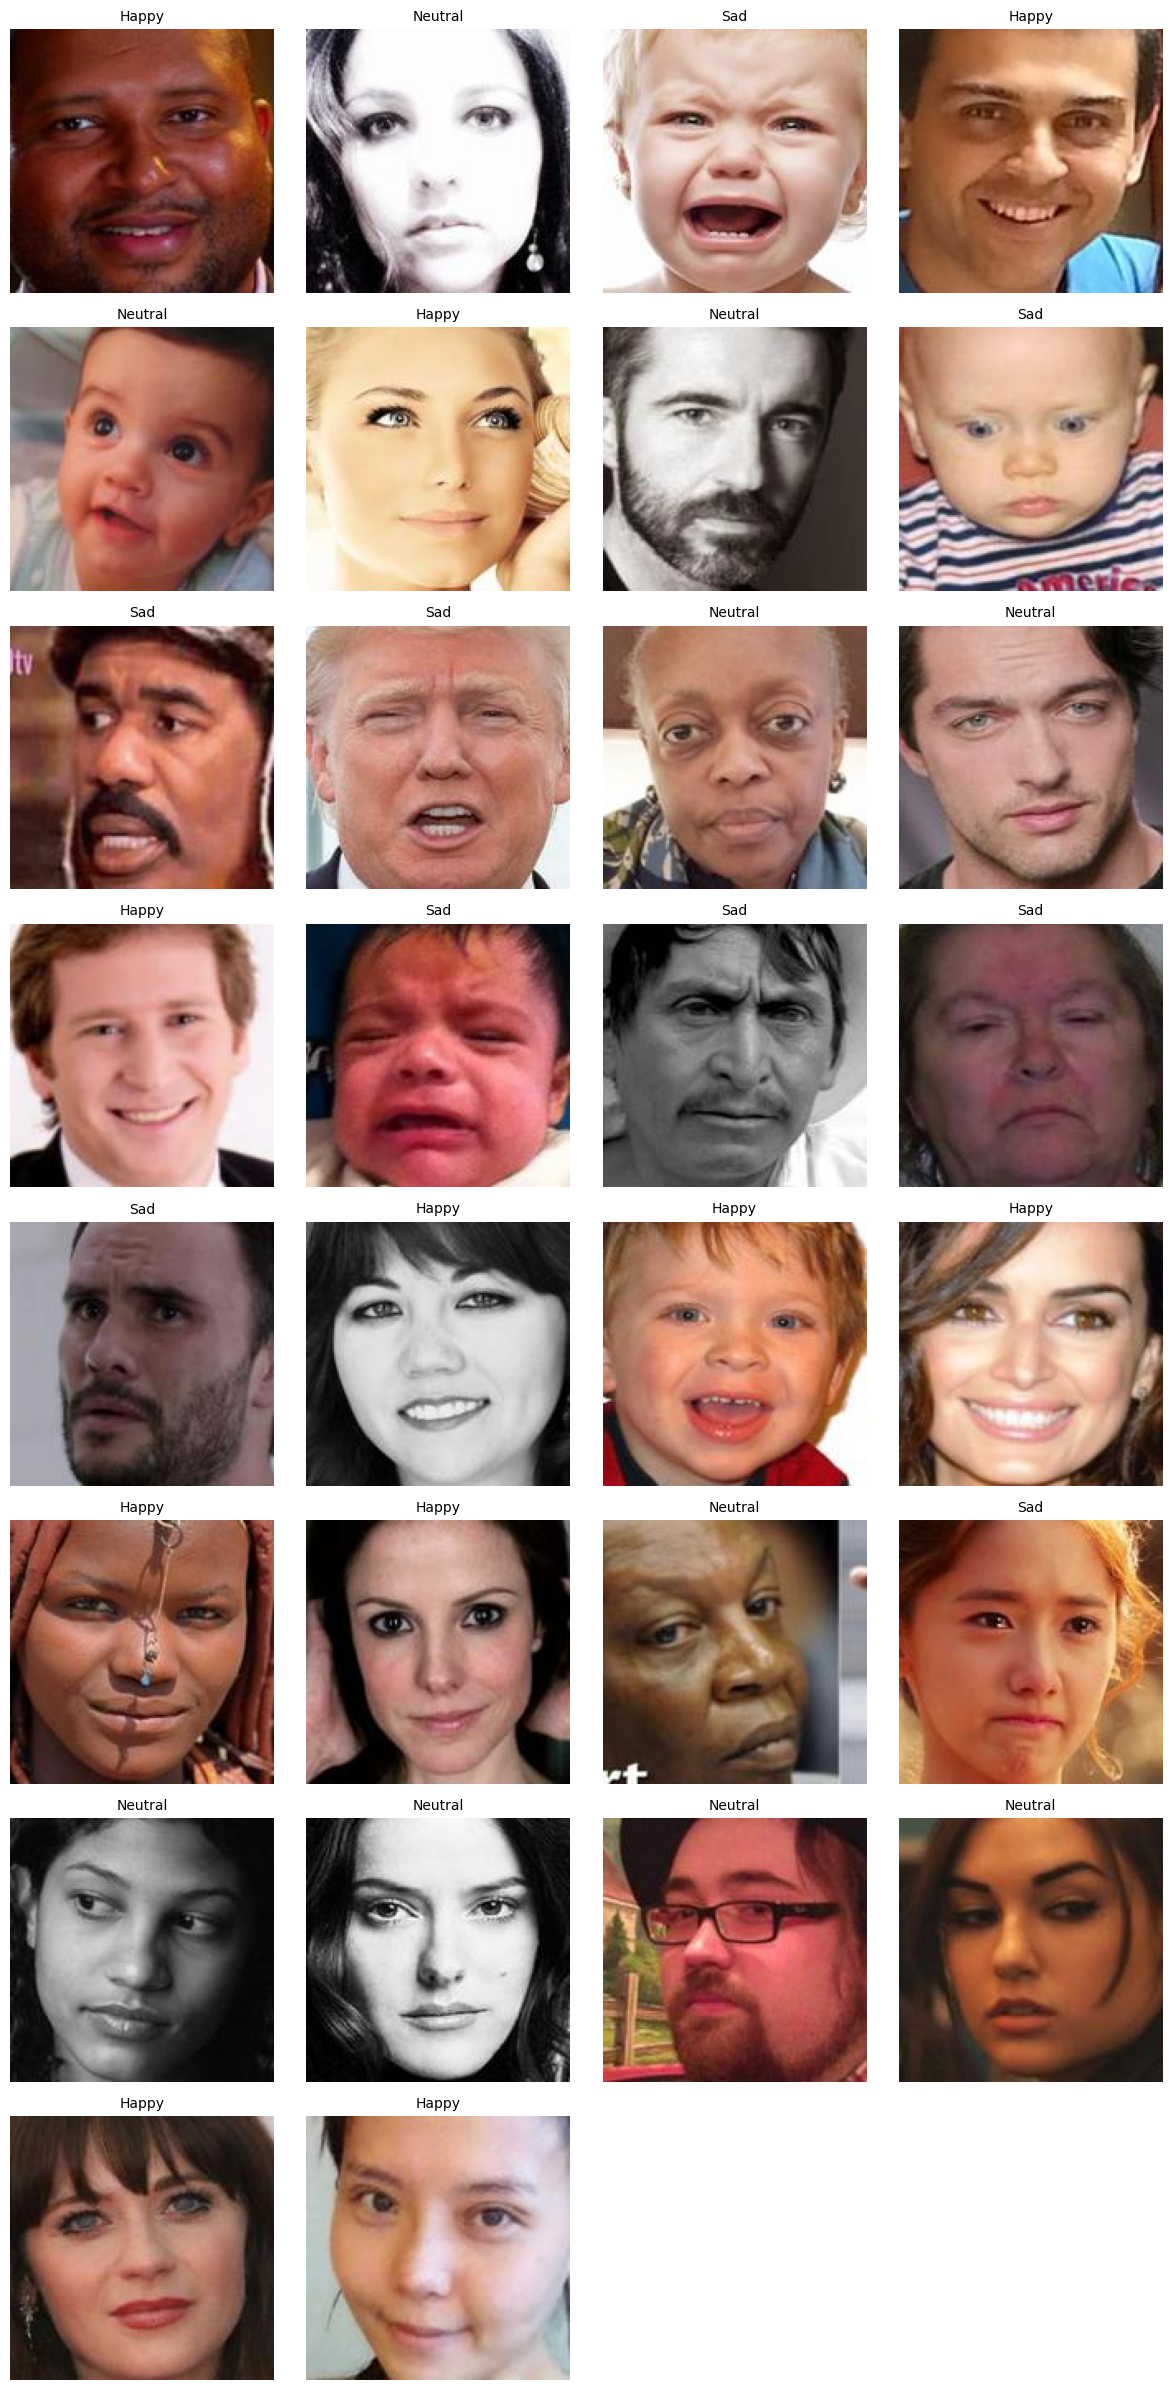

In [ ]:
# 1) 테스트 데이터 경로 및 클래스 이름 리스트 정의
test_path = '/content/drive/MyDrive/TestData_sample'
emotion_classes = ['Happy', 'Neutral', 'Sad']  # 숫자 인덱스 → 감정 문자열 매핑

# 2) FacialDataset 및 DataLoader 구성 (이미 작성하신 대로)
class FacialDataset(Dataset):
    def __init__(self, file_paths, labels=None, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img = Image.open(self.file_paths[idx]).convert('RGB')
        if self.transform:
            img = self.transform(img)
        else:
            img = transforms.ToTensor()(img)
        if self.labels is not None:
            return img, torch.tensor(self.labels[idx], dtype=torch.long)
        else:
            return img

test_file_paths = sorted([os.path.join(test_path, f) for f in os.listdir(test_path)])
test_dataset = FacialDataset(test_file_paths, labels=None)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# 3) 네트워크 구조 정의 (학습 때와 동일하게)
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3,16,3), nn.BatchNorm2d(16), nn.ReLU(),
            nn.Conv2d(16,16,3), nn.BatchNorm2d(16), nn.ReLU(),
            nn.Dropout2d(0.3), nn.MaxPool2d(3,2),

            nn.Conv2d(16,32,3), nn.BatchNorm2d(32), nn.ReLU(),
            nn.Conv2d(32,32,3), nn.BatchNorm2d(32), nn.ReLU(),
            nn.Dropout2d(0.3), nn.MaxPool2d(3,2),

            nn.Conv2d(32,64,3), nn.BatchNorm2d(64), nn.ReLU(),
            nn.Conv2d(64,64,3), nn.BatchNorm2d(64), nn.ReLU(),
            nn.Dropout2d(0.3), nn.MaxPool2d(3,2),

            nn.Conv2d(64,128,3), nn.BatchNorm2d(128), nn.ReLU(),
            nn.Conv2d(128,128,3), nn.BatchNorm2d(128), nn.ReLU(),
            nn.Dropout2d(0.3), nn.MaxPool2d(3,2),
        )
        self.fc1 = nn.Linear(128*5*5, 128)
        self.bn1 = nn.BatchNorm1d(128); self.relu1 = nn.ReLU(); self.drop1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128,64)
        self.bn2 = nn.BatchNorm1d(64);  self.relu2 = nn.ReLU(); self.drop2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64,3)
    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.drop1(self.relu1(self.bn1(self.fc1(x))))
        x = self.drop2(self.relu2(self.bn2(self.fc2(x))))
        return self.fc3(x)

# 4) 모델 불러오기 (State Dict 방식으로 저장된 가중치를 불러왔다고 가정)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
model = torch.load('/content/best_model_fold2.pth', weights_only=False)# evaluation
model.eval()

# 5) 예측 수행 및 (파일명, 예측 감정) 리스트 생성
f_imgname = []
f_pred_emotion = []

with torch.no_grad():
    for batch_imgs in test_loader:
        batch_imgs = batch_imgs.to(device)
        outputs = model(batch_imgs)
        _, preds = outputs.max(1)  # preds: tensor([0,2,1,...])
        preds = preds.cpu().numpy()

        # 현재 배치에 대응하는 파일명 범위 추출
        # DataLoader는 shuffle=False이므로 test_file_paths 순서와 동일하게 배치가 나옴
        start_idx = len(f_imgname)
        for i, p in enumerate(preds):
            img_path = test_file_paths[start_idx + i]
            img_name = os.path.basename(img_path)  # 파일명만 추출
            f_imgname.append(img_name)
            f_pred_emotion.append(emotion_classes[p])
import matplotlib.pyplot as plt
from PIL import Image
import math

num_images = len(test_file_paths)
cols = 4  # 한 행에 표시할 이미지 개수
rows = math.ceil(num_images / cols)

plt.figure(figsize=(cols * 3, rows * 3))
for idx, (img_path, pred) in enumerate(zip(test_file_paths, f_pred_emotion)):
    image = Image.open(img_path).convert('RGB')
    ax = plt.subplot(rows, cols, idx + 1)
    ax.imshow(image)
    ax.set_title(pred, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()